In [2]:
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import pandas as pd
import nibabel as nib
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism

/Users/ahmedshaheen/miniforge3/envs/ml/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/ahmedshaheen/miniforge3/envs/ml/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: (__ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE)
  Referenced from: '/Users/ahmedshaheen/miniforge3/envs/ml/lib/python3.9/site-packages/torchvision/image.so'
  Expected in: '/Users/ahmedshaheen/miniforge3/envs/ml/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'
  warn(f"Failed to load image Python extension: {e}")


In [5]:
device = "cpu"

In [6]:
df = pd.read_csv('UPENN-GBM_clinical_info_v1.1.csv')
dftst = df[:5]
dftrn = df[5:10] 

In [7]:
#Moving flair files
#patients = df['ID'] 
 
#for patient in patients: 
    #patient = str(patient)
    #img_file = 'images_structural' + "/" + patient
    #src_path = os.path.join(img_file, patient + '_T1GD.nii.gz')
    #dst_path = r"images_structural"
    #shutil.move(src_path, dst_path)


In [8]:
in_dir = ''

In [9]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss

import torch
from preporcess import prepare
from utilities import train

In [10]:
data_dir = in_dir
model_dir = 'results' 
data_in = prepare(data_dir, cache=True)

/Users/ahmedshaheen/miniforge3/envs/ml/lib/python3.9/site-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)
Loading dataset: 100%|████████████████████████████| 5/5 [00:01<00:00,  2.58it/s]


In [17]:
model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

TypeError: missing a required argument: 'spatial_dims'

In [12]:
#loss_function = DiceCELoss(to_onehot_y=True, sigmoid=True, squared_pred=True, ce_weight=calculate_weights(1792651250,2510860).to(device))
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)


In [149]:
if __name__ == '__main__':
    train(model, data_in, loss_function, optimizer, 600, model_dir, device=device)

----------
epoch 1/600
1/5, Train_loss: 0.5923
Train_dice: 0.4077
2/5, Train_loss: 0.5563
Train_dice: 0.4437
3/5, Train_loss: 0.5827
Train_dice: 0.4173
4/5, Train_loss: 0.5837
Train_dice: 0.4163
5/5, Train_loss: 0.5777
Train_dice: 0.4223
--------------------
Epoch_loss: 0.5786
Epoch_metric: 0.4214
test_loss_epoch: 0.5805
test_dice_epoch: 0.4086
current epoch: 1 current mean dice: 0.4003
best mean dice: 0.4086 at epoch: 1
----------
epoch 2/600
1/5, Train_loss: 0.5917
Train_dice: 0.4083
2/5, Train_loss: 0.5551
Train_dice: 0.4449
3/5, Train_loss: 0.5820
Train_dice: 0.4180
4/5, Train_loss: 0.5830
Train_dice: 0.4170
5/5, Train_loss: 0.5770
Train_dice: 0.4230
--------------------
Epoch_loss: 0.5777
Epoch_metric: 0.4223
test_loss_epoch: 0.5798
test_dice_epoch: 0.4104
current epoch: 2 current mean dice: 0.4022
best mean dice: 0.4104 at epoch: 2
----------
epoch 3/600
1/5, Train_loss: 0.5911
Train_dice: 0.4089
2/5, Train_loss: 0.5540
Train_dice: 0.4460
3/5, Train_loss: 0.5813
Train_dice: 0.418

3/5, Train_loss: 0.5719
Train_dice: 0.4281
4/5, Train_loss: 0.5731
Train_dice: 0.4269
5/5, Train_loss: 0.5663
Train_dice: 0.4337
--------------------
Epoch_loss: 0.5669
Epoch_metric: 0.4331
test_loss_epoch: 0.5699
test_dice_epoch: 0.4305
current epoch: 20 current mean dice: 0.4212
best mean dice: 0.4305 at epoch: 20
----------
epoch 21/600
1/5, Train_loss: 0.5833
Train_dice: 0.4167
2/5, Train_loss: 0.5388
Train_dice: 0.4612
3/5, Train_loss: 0.5715
Train_dice: 0.4285
4/5, Train_loss: 0.5727
Train_dice: 0.4273
5/5, Train_loss: 0.5658
Train_dice: 0.4342
--------------------
Epoch_loss: 0.5664
Epoch_metric: 0.4336
test_loss_epoch: 0.5694
test_dice_epoch: 0.4309
current epoch: 21 current mean dice: 0.4215
best mean dice: 0.4309 at epoch: 21
----------
epoch 22/600
1/5, Train_loss: 0.5830
Train_dice: 0.4170
2/5, Train_loss: 0.5381
Train_dice: 0.4619
3/5, Train_loss: 0.5711
Train_dice: 0.4289
4/5, Train_loss: 0.5723
Train_dice: 0.4277
5/5, Train_loss: 0.5654
Train_dice: 0.4346
---------------

5/5, Train_loss: 0.5593
Train_dice: 0.4407
--------------------
Epoch_loss: 0.5598
Epoch_metric: 0.4402
test_loss_epoch: 0.5633
test_dice_epoch: 0.4366
current epoch: 39 current mean dice: 0.4264
best mean dice: 0.4366 at epoch: 39
----------
epoch 40/600
1/5, Train_loss: 0.5780
Train_dice: 0.4220
2/5, Train_loss: 0.5289
Train_dice: 0.4711
3/5, Train_loss: 0.5651
Train_dice: 0.4349
4/5, Train_loss: 0.5664
Train_dice: 0.4336
5/5, Train_loss: 0.5590
Train_dice: 0.4410
--------------------
Epoch_loss: 0.5595
Epoch_metric: 0.4405
test_loss_epoch: 0.5630
test_dice_epoch: 0.4369
current epoch: 40 current mean dice: 0.4266
best mean dice: 0.4369 at epoch: 40
----------
epoch 41/600
1/5, Train_loss: 0.5778
Train_dice: 0.4222
2/5, Train_loss: 0.5285
Train_dice: 0.4715
3/5, Train_loss: 0.5648
Train_dice: 0.4352
4/5, Train_loss: 0.5661
Train_dice: 0.4339
5/5, Train_loss: 0.5586
Train_dice: 0.4414
--------------------
Epoch_loss: 0.5592
Epoch_metric: 0.4408
test_loss_epoch: 0.5627
test_dice_epoch:

test_loss_epoch: 0.5586
test_dice_epoch: 0.4409
current epoch: 58 current mean dice: 0.4299
best mean dice: 0.4409 at epoch: 58
----------
epoch 59/600
1/5, Train_loss: 0.5741
Train_dice: 0.4259
2/5, Train_loss: 0.5212
Train_dice: 0.4788
3/5, Train_loss: 0.5603
Train_dice: 0.4397
4/5, Train_loss: 0.5616
Train_dice: 0.4384
5/5, Train_loss: 0.5538
Train_dice: 0.4462
--------------------
Epoch_loss: 0.5542
Epoch_metric: 0.4458
test_loss_epoch: 0.5584
test_dice_epoch: 0.4410
current epoch: 59 current mean dice: 0.4300
best mean dice: 0.4410 at epoch: 59
----------
epoch 60/600
1/5, Train_loss: 0.5740
Train_dice: 0.4260
2/5, Train_loss: 0.5207
Train_dice: 0.4793
3/5, Train_loss: 0.5600
Train_dice: 0.4400
4/5, Train_loss: 0.5614
Train_dice: 0.4386
5/5, Train_loss: 0.5535
Train_dice: 0.4465
--------------------
Epoch_loss: 0.5539
Epoch_metric: 0.4461
test_loss_epoch: 0.5582
test_dice_epoch: 0.4412
current epoch: 60 current mean dice: 0.4301
best mean dice: 0.4412 at epoch: 60
----------
epoch

1/5, Train_loss: 0.5709
Train_dice: 0.4291
2/5, Train_loss: 0.5138
Train_dice: 0.4862
3/5, Train_loss: 0.5559
Train_dice: 0.4441
4/5, Train_loss: 0.5574
Train_dice: 0.4426
5/5, Train_loss: 0.5489
Train_dice: 0.4511
--------------------
Epoch_loss: 0.5494
Epoch_metric: 0.4506
test_loss_epoch: 0.5549
test_dice_epoch: 0.4447
current epoch: 78 current mean dice: 0.4331
best mean dice: 0.4447 at epoch: 78
----------
epoch 79/600
1/5, Train_loss: 0.5707
Train_dice: 0.4293
2/5, Train_loss: 0.5134
Train_dice: 0.4866
3/5, Train_loss: 0.5557
Train_dice: 0.4443
4/5, Train_loss: 0.5572
Train_dice: 0.4428
5/5, Train_loss: 0.5487
Train_dice: 0.4513
--------------------
Epoch_loss: 0.5491
Epoch_metric: 0.4509
test_loss_epoch: 0.5547
test_dice_epoch: 0.4449
current epoch: 79 current mean dice: 0.4332
best mean dice: 0.4449 at epoch: 79
----------
epoch 80/600
1/5, Train_loss: 0.5705
Train_dice: 0.4295
2/5, Train_loss: 0.5130
Train_dice: 0.4870
3/5, Train_loss: 0.5554
Train_dice: 0.4446
4/5, Train_loss

3/5, Train_loss: 0.5515
Train_dice: 0.4485
4/5, Train_loss: 0.5532
Train_dice: 0.4468
5/5, Train_loss: 0.5438
Train_dice: 0.4562
--------------------
Epoch_loss: 0.5445
Epoch_metric: 0.4555
test_loss_epoch: 0.5525
test_dice_epoch: 0.4481
current epoch: 97 current mean dice: 0.4355
best mean dice: 0.4481 at epoch: 97
----------
epoch 98/600
1/5, Train_loss: 0.5677
Train_dice: 0.4323
2/5, Train_loss: 0.5062
Train_dice: 0.4938
3/5, Train_loss: 0.5513
Train_dice: 0.4487
4/5, Train_loss: 0.5530
Train_dice: 0.4470
5/5, Train_loss: 0.5437
Train_dice: 0.4563
--------------------
Epoch_loss: 0.5444
Epoch_metric: 0.4556
test_loss_epoch: 0.5525
test_dice_epoch: 0.4478
current epoch: 98 current mean dice: 0.4352
best mean dice: 0.4481 at epoch: 97
----------
epoch 99/600
1/5, Train_loss: 0.5674
Train_dice: 0.4326
2/5, Train_loss: 0.5059
Train_dice: 0.4941
3/5, Train_loss: 0.5511
Train_dice: 0.4489
4/5, Train_loss: 0.5528
Train_dice: 0.4472
5/5, Train_loss: 0.5432
Train_dice: 0.4568
---------------

4/5, Train_loss: 0.5497
Train_dice: 0.4503
5/5, Train_loss: 0.5396
Train_dice: 0.4604
--------------------
Epoch_loss: 0.5406
Epoch_metric: 0.4594
test_loss_epoch: 0.5505
test_dice_epoch: 0.4504
current epoch: 116 current mean dice: 0.4372
best mean dice: 0.4504 at epoch: 116
----------
epoch 117/600
1/5, Train_loss: 0.5648
Train_dice: 0.4352
2/5, Train_loss: 0.5006
Train_dice: 0.4994
3/5, Train_loss: 0.5476
Train_dice: 0.4524
4/5, Train_loss: 0.5495
Train_dice: 0.4505
5/5, Train_loss: 0.5394
Train_dice: 0.4606
--------------------
Epoch_loss: 0.5404
Epoch_metric: 0.4596
test_loss_epoch: 0.5505
test_dice_epoch: 0.4504
current epoch: 117 current mean dice: 0.4373
best mean dice: 0.4504 at epoch: 117
----------
epoch 118/600
1/5, Train_loss: 0.5647
Train_dice: 0.4353
2/5, Train_loss: 0.5004
Train_dice: 0.4996
3/5, Train_loss: 0.5475
Train_dice: 0.4525
4/5, Train_loss: 0.5494
Train_dice: 0.4506
5/5, Train_loss: 0.5392
Train_dice: 0.4608
--------------------
Epoch_loss: 0.5402
Epoch_metric

5/5, Train_loss: 0.5362
Train_dice: 0.4638
--------------------
Epoch_loss: 0.5374
Epoch_metric: 0.4626
test_loss_epoch: 0.5488
test_dice_epoch: 0.4520
current epoch: 135 current mean dice: 0.4384
best mean dice: 0.4521 at epoch: 134
----------
epoch 136/600
1/5, Train_loss: 0.5626
Train_dice: 0.4374
2/5, Train_loss: 0.4962
Train_dice: 0.5038
3/5, Train_loss: 0.5447
Train_dice: 0.4553
4/5, Train_loss: 0.5467
Train_dice: 0.4533
5/5, Train_loss: 0.5361
Train_dice: 0.4639
--------------------
Epoch_loss: 0.5373
Epoch_metric: 0.4627
test_loss_epoch: 0.5488
test_dice_epoch: 0.4525
current epoch: 136 current mean dice: 0.4387
best mean dice: 0.4525 at epoch: 136
----------
epoch 137/600
1/5, Train_loss: 0.5625
Train_dice: 0.4375
2/5, Train_loss: 0.4959
Train_dice: 0.5041
3/5, Train_loss: 0.5446
Train_dice: 0.4554
4/5, Train_loss: 0.5466
Train_dice: 0.4534
5/5, Train_loss: 0.5360
Train_dice: 0.4640
--------------------
Epoch_loss: 0.5371
Epoch_metric: 0.4629
test_loss_epoch: 0.5485
test_dice_

test_loss_epoch: 0.5474
test_dice_epoch: 0.4540
current epoch: 154 current mean dice: 0.4402
best mean dice: 0.4540 at epoch: 154
----------
epoch 155/600
1/5, Train_loss: 0.5606
Train_dice: 0.4394
2/5, Train_loss: 0.4924
Train_dice: 0.5076
3/5, Train_loss: 0.5422
Train_dice: 0.4578
4/5, Train_loss: 0.5443
Train_dice: 0.4557
5/5, Train_loss: 0.5333
Train_dice: 0.4667
--------------------
Epoch_loss: 0.5346
Epoch_metric: 0.4654
test_loss_epoch: 0.5471
test_dice_epoch: 0.4542
current epoch: 155 current mean dice: 0.4404
best mean dice: 0.4542 at epoch: 155
----------
epoch 156/600
1/5, Train_loss: 0.5605
Train_dice: 0.4395
2/5, Train_loss: 0.4922
Train_dice: 0.5078
3/5, Train_loss: 0.5421
Train_dice: 0.4579
4/5, Train_loss: 0.5442
Train_dice: 0.4558
5/5, Train_loss: 0.5332
Train_dice: 0.4668
--------------------
Epoch_loss: 0.5344
Epoch_metric: 0.4656
test_loss_epoch: 0.5471
test_dice_epoch: 0.4542
current epoch: 156 current mean dice: 0.4402
best mean dice: 0.4542 at epoch: 155
--------

1/5, Train_loss: 0.5588
Train_dice: 0.4412
2/5, Train_loss: 0.4891
Train_dice: 0.5109
3/5, Train_loss: 0.5400
Train_dice: 0.4600
4/5, Train_loss: 0.5421
Train_dice: 0.4579
5/5, Train_loss: 0.5309
Train_dice: 0.4691
--------------------
Epoch_loss: 0.5322
Epoch_metric: 0.4678
test_loss_epoch: 0.5457
test_dice_epoch: 0.4558
current epoch: 174 current mean dice: 0.4413
best mean dice: 0.4558 at epoch: 174
----------
epoch 175/600
1/5, Train_loss: 0.5587
Train_dice: 0.4413
2/5, Train_loss: 0.4889
Train_dice: 0.5111
3/5, Train_loss: 0.5398
Train_dice: 0.4602
4/5, Train_loss: 0.5420
Train_dice: 0.4580
5/5, Train_loss: 0.5308
Train_dice: 0.4692
--------------------
Epoch_loss: 0.5321
Epoch_metric: 0.4679
test_loss_epoch: 0.5456
test_dice_epoch: 0.4558
current epoch: 175 current mean dice: 0.4417
best mean dice: 0.4558 at epoch: 175
----------
epoch 176/600
1/5, Train_loss: 0.5586
Train_dice: 0.4414
2/5, Train_loss: 0.4888
Train_dice: 0.5112
3/5, Train_loss: 0.5397
Train_dice: 0.4603
4/5, Trai

2/5, Train_loss: 0.4861
Train_dice: 0.5139
3/5, Train_loss: 0.5379
Train_dice: 0.4621
4/5, Train_loss: 0.5401
Train_dice: 0.4599
5/5, Train_loss: 0.5286
Train_dice: 0.4714
--------------------
Epoch_loss: 0.5300
Epoch_metric: 0.4700
test_loss_epoch: 0.5442
test_dice_epoch: 0.4573
current epoch: 193 current mean dice: 0.4429
best mean dice: 0.4573 at epoch: 193
----------
epoch 194/600
1/5, Train_loss: 0.5570
Train_dice: 0.4430
2/5, Train_loss: 0.4860
Train_dice: 0.5140
3/5, Train_loss: 0.5378
Train_dice: 0.4622
4/5, Train_loss: 0.5400
Train_dice: 0.4600
5/5, Train_loss: 0.5285
Train_dice: 0.4715
--------------------
Epoch_loss: 0.5298
Epoch_metric: 0.4702
test_loss_epoch: 0.5441
test_dice_epoch: 0.4573
current epoch: 194 current mean dice: 0.4429
best mean dice: 0.4573 at epoch: 194
----------
epoch 195/600
1/5, Train_loss: 0.5570
Train_dice: 0.4430
2/5, Train_loss: 0.4858
Train_dice: 0.5142
3/5, Train_loss: 0.5377
Train_dice: 0.4623
4/5, Train_loss: 0.5399
Train_dice: 0.4601
5/5, Trai

3/5, Train_loss: 0.5360
Train_dice: 0.4640
4/5, Train_loss: 0.5382
Train_dice: 0.4618
5/5, Train_loss: 0.5266
Train_dice: 0.4734
--------------------
Epoch_loss: 0.5280
Epoch_metric: 0.4720
test_loss_epoch: 0.5428
test_dice_epoch: 0.4587
current epoch: 212 current mean dice: 0.4440
best mean dice: 0.4590 at epoch: 211
----------
epoch 213/600
1/5, Train_loss: 0.5555
Train_dice: 0.4445
2/5, Train_loss: 0.4834
Train_dice: 0.5166
3/5, Train_loss: 0.5359
Train_dice: 0.4641
4/5, Train_loss: 0.5381
Train_dice: 0.4619
5/5, Train_loss: 0.5265
Train_dice: 0.4735
--------------------
Epoch_loss: 0.5279
Epoch_metric: 0.4721
test_loss_epoch: 0.5426
test_dice_epoch: 0.4590
current epoch: 213 current mean dice: 0.4447
best mean dice: 0.4590 at epoch: 213
----------
epoch 214/600
1/5, Train_loss: 0.5554
Train_dice: 0.4446
2/5, Train_loss: 0.4832
Train_dice: 0.5168
3/5, Train_loss: 0.5358
Train_dice: 0.4642
4/5, Train_loss: 0.5380
Train_dice: 0.4620
5/5, Train_loss: 0.5264
Train_dice: 0.4736
---------

4/5, Train_loss: 0.5365
Train_dice: 0.4635
5/5, Train_loss: 0.5247
Train_dice: 0.4753
--------------------
Epoch_loss: 0.5261
Epoch_metric: 0.4739
test_loss_epoch: 0.5413
test_dice_epoch: 0.4605
current epoch: 231 current mean dice: 0.4456
best mean dice: 0.4605 at epoch: 231
----------
epoch 232/600
1/5, Train_loss: 0.5540
Train_dice: 0.4460
2/5, Train_loss: 0.4809
Train_dice: 0.5191
3/5, Train_loss: 0.5341
Train_dice: 0.4659
4/5, Train_loss: 0.5364
Train_dice: 0.4636
5/5, Train_loss: 0.5246
Train_dice: 0.4754
--------------------
Epoch_loss: 0.5260
Epoch_metric: 0.4740
test_loss_epoch: 0.5412
test_dice_epoch: 0.4602
current epoch: 232 current mean dice: 0.4459
best mean dice: 0.4605 at epoch: 231
----------
epoch 233/600
1/5, Train_loss: 0.5539
Train_dice: 0.4461
2/5, Train_loss: 0.4808
Train_dice: 0.5192
3/5, Train_loss: 0.5340
Train_dice: 0.4660
4/5, Train_loss: 0.5363
Train_dice: 0.4637
5/5, Train_loss: 0.5245
Train_dice: 0.4755
--------------------
Epoch_loss: 0.5259
Epoch_metric

5/5, Train_loss: 0.5228
Train_dice: 0.4772
--------------------
Epoch_loss: 0.5242
Epoch_metric: 0.4758
test_loss_epoch: 0.5399
test_dice_epoch: 0.4618
current epoch: 250 current mean dice: 0.4471
best mean dice: 0.4618 at epoch: 250
----------
epoch 251/600
1/5, Train_loss: 0.5525
Train_dice: 0.4475
2/5, Train_loss: 0.4785
Train_dice: 0.5215
3/5, Train_loss: 0.5324
Train_dice: 0.4676
4/5, Train_loss: 0.5347
Train_dice: 0.4653
5/5, Train_loss: 0.5227
Train_dice: 0.4773
--------------------
Epoch_loss: 0.5242
Epoch_metric: 0.4758
test_loss_epoch: 0.5398
test_dice_epoch: 0.4619
current epoch: 251 current mean dice: 0.4473
best mean dice: 0.4619 at epoch: 251
----------
epoch 252/600
1/5, Train_loss: 0.5524
Train_dice: 0.4476
2/5, Train_loss: 0.4784
Train_dice: 0.5216
3/5, Train_loss: 0.5323
Train_dice: 0.4677
4/5, Train_loss: 0.5346
Train_dice: 0.4654
5/5, Train_loss: 0.5226
Train_dice: 0.4774
--------------------
Epoch_loss: 0.5241
Epoch_metric: 0.4759
test_loss_epoch: 0.5398
test_dice_

test_loss_epoch: 0.5385
test_dice_epoch: 0.4633
current epoch: 269 current mean dice: 0.4485
best mean dice: 0.4633 at epoch: 269
----------
epoch 270/600
1/5, Train_loss: 0.5510
Train_dice: 0.4490
2/5, Train_loss: 0.4763
Train_dice: 0.5237
3/5, Train_loss: 0.5307
Train_dice: 0.4693
4/5, Train_loss: 0.5330
Train_dice: 0.4670
5/5, Train_loss: 0.5209
Train_dice: 0.4791
--------------------
Epoch_loss: 0.5224
Epoch_metric: 0.4776
test_loss_epoch: 0.5385
test_dice_epoch: 0.4632
current epoch: 270 current mean dice: 0.4486
best mean dice: 0.4633 at epoch: 269
----------
epoch 271/600
1/5, Train_loss: 0.5510
Train_dice: 0.4490
2/5, Train_loss: 0.4762
Train_dice: 0.5238
3/5, Train_loss: 0.5306
Train_dice: 0.4694
4/5, Train_loss: 0.5329
Train_dice: 0.4671
5/5, Train_loss: 0.5208
Train_dice: 0.4792
--------------------
Epoch_loss: 0.5223
Epoch_metric: 0.4777
test_loss_epoch: 0.5384
test_dice_epoch: 0.4635
current epoch: 271 current mean dice: 0.4490
best mean dice: 0.4635 at epoch: 271
--------

1/5, Train_loss: 0.5496
Train_dice: 0.4504
2/5, Train_loss: 0.4741
Train_dice: 0.5259
3/5, Train_loss: 0.5290
Train_dice: 0.4710
4/5, Train_loss: 0.5314
Train_dice: 0.4686
5/5, Train_loss: 0.5192
Train_dice: 0.4808
--------------------
Epoch_loss: 0.5207
Epoch_metric: 0.4793
test_loss_epoch: 0.5371
test_dice_epoch: 0.4648
current epoch: 289 current mean dice: 0.4500
best mean dice: 0.4648 at epoch: 288
----------
epoch 290/600
1/5, Train_loss: 0.5495
Train_dice: 0.4505
2/5, Train_loss: 0.4740
Train_dice: 0.5260
3/5, Train_loss: 0.5290
Train_dice: 0.4710
4/5, Train_loss: 0.5313
Train_dice: 0.4687
5/5, Train_loss: 0.5191
Train_dice: 0.4809
--------------------
Epoch_loss: 0.5206
Epoch_metric: 0.4794
test_loss_epoch: 0.5370
test_dice_epoch: 0.4648
current epoch: 290 current mean dice: 0.4500
best mean dice: 0.4648 at epoch: 290
----------
epoch 291/600
1/5, Train_loss: 0.5494
Train_dice: 0.4506
2/5, Train_loss: 0.4738
Train_dice: 0.5262
3/5, Train_loss: 0.5289
Train_dice: 0.4711
4/5, Trai

2/5, Train_loss: 0.4720
Train_dice: 0.5280
3/5, Train_loss: 0.5275
Train_dice: 0.4725
4/5, Train_loss: 0.5298
Train_dice: 0.4702
5/5, Train_loss: 0.5175
Train_dice: 0.4825
--------------------
Epoch_loss: 0.5190
Epoch_metric: 0.4810
test_loss_epoch: 0.5358
test_dice_epoch: 0.4660
current epoch: 308 current mean dice: 0.4509
best mean dice: 0.4661 at epoch: 307
----------
epoch 309/600
1/5, Train_loss: 0.5481
Train_dice: 0.4519
2/5, Train_loss: 0.4719
Train_dice: 0.5281
3/5, Train_loss: 0.5274
Train_dice: 0.4726
4/5, Train_loss: 0.5297
Train_dice: 0.4703
5/5, Train_loss: 0.5174
Train_dice: 0.4826
--------------------
Epoch_loss: 0.5189
Epoch_metric: 0.4811
test_loss_epoch: 0.5355
test_dice_epoch: 0.4663
current epoch: 309 current mean dice: 0.4520
best mean dice: 0.4663 at epoch: 309
----------
epoch 310/600
1/5, Train_loss: 0.5481
Train_dice: 0.4519
2/5, Train_loss: 0.4718
Train_dice: 0.5282
3/5, Train_loss: 0.5273
Train_dice: 0.4727
4/5, Train_loss: 0.5297
Train_dice: 0.4703
5/5, Trai

3/5, Train_loss: 0.5259
Train_dice: 0.4741
4/5, Train_loss: 0.5283
Train_dice: 0.4717
5/5, Train_loss: 0.5158
Train_dice: 0.4842
--------------------
Epoch_loss: 0.5173
Epoch_metric: 0.4827
test_loss_epoch: 0.5344
test_dice_epoch: 0.4675
current epoch: 327 current mean dice: 0.4523
best mean dice: 0.4676 at epoch: 326
----------
epoch 328/600
1/5, Train_loss: 0.5468
Train_dice: 0.4532
2/5, Train_loss: 0.4698
Train_dice: 0.5302
3/5, Train_loss: 0.5258
Train_dice: 0.4742
4/5, Train_loss: 0.5282
Train_dice: 0.4718
5/5, Train_loss: 0.5157
Train_dice: 0.4843
--------------------
Epoch_loss: 0.5173
Epoch_metric: 0.4827
test_loss_epoch: 0.5342
test_dice_epoch: 0.4678
current epoch: 328 current mean dice: 0.4531
best mean dice: 0.4678 at epoch: 328
----------
epoch 329/600
1/5, Train_loss: 0.5467
Train_dice: 0.4533
2/5, Train_loss: 0.4697
Train_dice: 0.5303
3/5, Train_loss: 0.5257
Train_dice: 0.4743
4/5, Train_loss: 0.5281
Train_dice: 0.4719
5/5, Train_loss: 0.5157
Train_dice: 0.4843
---------

4/5, Train_loss: 0.5267
Train_dice: 0.4733
5/5, Train_loss: 0.5142
Train_dice: 0.4858
--------------------
Epoch_loss: 0.5157
Epoch_metric: 0.4843
test_loss_epoch: 0.5330
test_dice_epoch: 0.4689
current epoch: 346 current mean dice: 0.4539
best mean dice: 0.4689 at epoch: 346
----------
epoch 347/600
1/5, Train_loss: 0.5454
Train_dice: 0.4546
2/5, Train_loss: 0.4677
Train_dice: 0.5323
3/5, Train_loss: 0.5242
Train_dice: 0.4758
4/5, Train_loss: 0.5267
Train_dice: 0.4733
5/5, Train_loss: 0.5141
Train_dice: 0.4859
--------------------
Epoch_loss: 0.5156
Epoch_metric: 0.4844
test_loss_epoch: 0.5330
test_dice_epoch: 0.4689
current epoch: 347 current mean dice: 0.4540
best mean dice: 0.4689 at epoch: 347
----------
epoch 348/600
1/5, Train_loss: 0.5454
Train_dice: 0.4546
2/5, Train_loss: 0.4676
Train_dice: 0.5324
3/5, Train_loss: 0.5242
Train_dice: 0.4758
4/5, Train_loss: 0.5266
Train_dice: 0.4734
5/5, Train_loss: 0.5140
Train_dice: 0.4860
--------------------
Epoch_loss: 0.5155
Epoch_metric

5/5, Train_loss: 0.5125
Train_dice: 0.4875
--------------------
Epoch_loss: 0.5141
Epoch_metric: 0.4859
test_loss_epoch: 0.5318
test_dice_epoch: 0.4702
current epoch: 365 current mean dice: 0.4554
best mean dice: 0.4702 at epoch: 365
----------
epoch 366/600
1/5, Train_loss: 0.5441
Train_dice: 0.4559
2/5, Train_loss: 0.4657
Train_dice: 0.5343
3/5, Train_loss: 0.5227
Train_dice: 0.4773
4/5, Train_loss: 0.5252
Train_dice: 0.4748
5/5, Train_loss: 0.5125
Train_dice: 0.4875
--------------------
Epoch_loss: 0.5140
Epoch_metric: 0.4860
test_loss_epoch: 0.5317
test_dice_epoch: 0.4701
current epoch: 366 current mean dice: 0.4550
best mean dice: 0.4702 at epoch: 365
----------
epoch 367/600
1/5, Train_loss: 0.5441
Train_dice: 0.4559
2/5, Train_loss: 0.4656
Train_dice: 0.5344
3/5, Train_loss: 0.5227
Train_dice: 0.4773
4/5, Train_loss: 0.5251
Train_dice: 0.4749
5/5, Train_loss: 0.5124
Train_dice: 0.4876
--------------------
Epoch_loss: 0.5140
Epoch_metric: 0.4860
test_loss_epoch: 0.5314
test_dice_

test_loss_epoch: 0.5305
test_dice_epoch: 0.4714
current epoch: 384 current mean dice: 0.4564
best mean dice: 0.4715 at epoch: 383
----------
epoch 385/600
1/5, Train_loss: 0.5428
Train_dice: 0.4572
2/5, Train_loss: 0.4636
Train_dice: 0.5364
3/5, Train_loss: 0.5212
Train_dice: 0.4788
4/5, Train_loss: 0.5237
Train_dice: 0.4763
5/5, Train_loss: 0.5108
Train_dice: 0.4892
--------------------
Epoch_loss: 0.5124
Epoch_metric: 0.4876
test_loss_epoch: 0.5304
test_dice_epoch: 0.4716
current epoch: 385 current mean dice: 0.4565
best mean dice: 0.4716 at epoch: 385
----------
epoch 386/600
1/5, Train_loss: 0.5428
Train_dice: 0.4572
2/5, Train_loss: 0.4635
Train_dice: 0.5365
3/5, Train_loss: 0.5211
Train_dice: 0.4789
4/5, Train_loss: 0.5236
Train_dice: 0.4764
5/5, Train_loss: 0.5107
Train_dice: 0.4893
--------------------
Epoch_loss: 0.5123
Epoch_metric: 0.4877
test_loss_epoch: 0.5304
test_dice_epoch: 0.4716
current epoch: 386 current mean dice: 0.4565
best mean dice: 0.4716 at epoch: 385
--------

1/5, Train_loss: 0.5416
Train_dice: 0.4584
2/5, Train_loss: 0.4616
Train_dice: 0.5384
3/5, Train_loss: 0.5197
Train_dice: 0.4803
4/5, Train_loss: 0.5222
Train_dice: 0.4778
5/5, Train_loss: 0.5092
Train_dice: 0.4908
--------------------
Epoch_loss: 0.5109
Epoch_metric: 0.4891
test_loss_epoch: 0.5291
test_dice_epoch: 0.4728
current epoch: 404 current mean dice: 0.4579
best mean dice: 0.4728 at epoch: 404
----------
epoch 405/600
1/5, Train_loss: 0.5415
Train_dice: 0.4585
2/5, Train_loss: 0.4615
Train_dice: 0.5385
3/5, Train_loss: 0.5196
Train_dice: 0.4804
4/5, Train_loss: 0.5221
Train_dice: 0.4779
5/5, Train_loss: 0.5091
Train_dice: 0.4909
--------------------
Epoch_loss: 0.5108
Epoch_metric: 0.4892
test_loss_epoch: 0.5292
test_dice_epoch: 0.4728
current epoch: 405 current mean dice: 0.4577
best mean dice: 0.4728 at epoch: 405
----------
epoch 406/600
1/5, Train_loss: 0.5414
Train_dice: 0.4586
2/5, Train_loss: 0.4614
Train_dice: 0.5386
3/5, Train_loss: 0.5195
Train_dice: 0.4805
4/5, Trai

2/5, Train_loss: 0.4596
Train_dice: 0.5404
3/5, Train_loss: 0.5182
Train_dice: 0.4818
4/5, Train_loss: 0.5208
Train_dice: 0.4792
5/5, Train_loss: 0.5077
Train_dice: 0.4923
--------------------
Epoch_loss: 0.5093
Epoch_metric: 0.4907
test_loss_epoch: 0.5278
test_dice_epoch: 0.4742
current epoch: 423 current mean dice: 0.4588
best mean dice: 0.4742 at epoch: 423
----------
epoch 424/600
1/5, Train_loss: 0.5403
Train_dice: 0.4597
2/5, Train_loss: 0.4595
Train_dice: 0.5405
3/5, Train_loss: 0.5182
Train_dice: 0.4818
4/5, Train_loss: 0.5207
Train_dice: 0.4793
5/5, Train_loss: 0.5076
Train_dice: 0.4924
--------------------
Epoch_loss: 0.5092
Epoch_metric: 0.4908
test_loss_epoch: 0.5279
test_dice_epoch: 0.4740
current epoch: 424 current mean dice: 0.4589
best mean dice: 0.4742 at epoch: 423
----------
epoch 425/600
1/5, Train_loss: 0.5402
Train_dice: 0.4598
2/5, Train_loss: 0.4594
Train_dice: 0.5406
3/5, Train_loss: 0.5181
Train_dice: 0.4819
4/5, Train_loss: 0.5206
Train_dice: 0.4794
5/5, Trai

3/5, Train_loss: 0.5167
Train_dice: 0.4833
4/5, Train_loss: 0.5193
Train_dice: 0.4807
5/5, Train_loss: 0.5061
Train_dice: 0.4939
--------------------
Epoch_loss: 0.5078
Epoch_metric: 0.4922
test_loss_epoch: 0.5266
test_dice_epoch: 0.4755
current epoch: 442 current mean dice: 0.4602
best mean dice: 0.4755 at epoch: 442
----------
epoch 443/600
1/5, Train_loss: 0.5390
Train_dice: 0.4610
2/5, Train_loss: 0.4575
Train_dice: 0.5425
3/5, Train_loss: 0.5167
Train_dice: 0.4833
4/5, Train_loss: 0.5192
Train_dice: 0.4808
5/5, Train_loss: 0.5060
Train_dice: 0.4940
--------------------
Epoch_loss: 0.5077
Epoch_metric: 0.4923
test_loss_epoch: 0.5266
test_dice_epoch: 0.4751
current epoch: 443 current mean dice: 0.4599
best mean dice: 0.4755 at epoch: 442
----------
epoch 444/600
1/5, Train_loss: 0.5390
Train_dice: 0.4610
2/5, Train_loss: 0.4574
Train_dice: 0.5426
3/5, Train_loss: 0.5166
Train_dice: 0.4834
4/5, Train_loss: 0.5192
Train_dice: 0.4808
5/5, Train_loss: 0.5059
Train_dice: 0.4941
---------

4/5, Train_loss: 0.5179
Train_dice: 0.4821
5/5, Train_loss: 0.5045
Train_dice: 0.4955
--------------------
Epoch_loss: 0.5062
Epoch_metric: 0.4938
test_loss_epoch: 0.5254
test_dice_epoch: 0.4767
current epoch: 461 current mean dice: 0.4613
best mean dice: 0.4767 at epoch: 461
----------
epoch 462/600
1/5, Train_loss: 0.5378
Train_dice: 0.4622
2/5, Train_loss: 0.4555
Train_dice: 0.5445
3/5, Train_loss: 0.5152
Train_dice: 0.4848
4/5, Train_loss: 0.5178
Train_dice: 0.4822
5/5, Train_loss: 0.5044
Train_dice: 0.4956
--------------------
Epoch_loss: 0.5062
Epoch_metric: 0.4938
test_loss_epoch: 0.5255
test_dice_epoch: 0.4765
current epoch: 462 current mean dice: 0.4610
best mean dice: 0.4767 at epoch: 461
----------
epoch 463/600
1/5, Train_loss: 0.5378
Train_dice: 0.4622
2/5, Train_loss: 0.4554
Train_dice: 0.5446
3/5, Train_loss: 0.5151
Train_dice: 0.4849
4/5, Train_loss: 0.5177
Train_dice: 0.4823
5/5, Train_loss: 0.5043
Train_dice: 0.4957
--------------------
Epoch_loss: 0.5061
Epoch_metric

5/5, Train_loss: 0.5029
Train_dice: 0.4971
--------------------
Epoch_loss: 0.5047
Epoch_metric: 0.4953
test_loss_epoch: 0.5243
test_dice_epoch: 0.4775
current epoch: 480 current mean dice: 0.4620
best mean dice: 0.4777 at epoch: 479
----------
epoch 481/600
1/5, Train_loss: 0.5367
Train_dice: 0.4633
2/5, Train_loss: 0.4534
Train_dice: 0.5466
3/5, Train_loss: 0.5138
Train_dice: 0.4862
4/5, Train_loss: 0.5164
Train_dice: 0.4836
5/5, Train_loss: 0.5029
Train_dice: 0.4971
--------------------
Epoch_loss: 0.5046
Epoch_metric: 0.4954
test_loss_epoch: 0.5242
test_dice_epoch: 0.4779
current epoch: 481 current mean dice: 0.4621
best mean dice: 0.4779 at epoch: 481
----------
epoch 482/600
1/5, Train_loss: 0.5366
Train_dice: 0.4634
2/5, Train_loss: 0.4533
Train_dice: 0.5467
3/5, Train_loss: 0.5137
Train_dice: 0.4863
4/5, Train_loss: 0.5163
Train_dice: 0.4837
5/5, Train_loss: 0.5028
Train_dice: 0.4972
--------------------
Epoch_loss: 0.5045
Epoch_metric: 0.4955
test_loss_epoch: 0.5242
test_dice_

test_loss_epoch: 0.5234
test_dice_epoch: 0.4781
current epoch: 499 current mean dice: 0.4619
best mean dice: 0.4792 at epoch: 498
----------
epoch 500/600
1/5, Train_loss: 0.5356
Train_dice: 0.4644
2/5, Train_loss: 0.4516
Train_dice: 0.5484
3/5, Train_loss: 0.5124
Train_dice: 0.4876
4/5, Train_loss: 0.5150
Train_dice: 0.4850
5/5, Train_loss: 0.5014
Train_dice: 0.4986
--------------------
Epoch_loss: 0.5032
Epoch_metric: 0.4968
test_loss_epoch: 0.5229
test_dice_epoch: 0.4794
current epoch: 500 current mean dice: 0.4642
best mean dice: 0.4794 at epoch: 500
----------
epoch 501/600
1/5, Train_loss: 0.5355
Train_dice: 0.4645
2/5, Train_loss: 0.4515
Train_dice: 0.5485
3/5, Train_loss: 0.5123
Train_dice: 0.4877
4/5, Train_loss: 0.5149
Train_dice: 0.4851
5/5, Train_loss: 0.5013
Train_dice: 0.4987
--------------------
Epoch_loss: 0.5031
Epoch_metric: 0.4969
test_loss_epoch: 0.5232
test_dice_epoch: 0.4784
current epoch: 501 current mean dice: 0.4624
best mean dice: 0.4794 at epoch: 500
--------

1/5, Train_loss: 0.5343
Train_dice: 0.4657
2/5, Train_loss: 0.4494
Train_dice: 0.5506
3/5, Train_loss: 0.5109
Train_dice: 0.4891
4/5, Train_loss: 0.5136
Train_dice: 0.4864
5/5, Train_loss: 0.4997
Train_dice: 0.5003
--------------------
Epoch_loss: 0.5016
Epoch_metric: 0.4984
test_loss_epoch: 0.5220
test_dice_epoch: 0.4801
current epoch: 519 current mean dice: 0.4641
best mean dice: 0.4801 at epoch: 519
----------
epoch 520/600
1/5, Train_loss: 0.5343
Train_dice: 0.4657
2/5, Train_loss: 0.4492
Train_dice: 0.5508
3/5, Train_loss: 0.5108
Train_dice: 0.4892
4/5, Train_loss: 0.5135
Train_dice: 0.4865
5/5, Train_loss: 0.4997
Train_dice: 0.5003
--------------------
Epoch_loss: 0.5015
Epoch_metric: 0.4985
test_loss_epoch: 0.5219
test_dice_epoch: 0.4801
current epoch: 520 current mean dice: 0.4641
best mean dice: 0.4801 at epoch: 520
----------
epoch 521/600
1/5, Train_loss: 0.5342
Train_dice: 0.4658
2/5, Train_loss: 0.4491
Train_dice: 0.5509
3/5, Train_loss: 0.5107
Train_dice: 0.4893
4/5, Trai

2/5, Train_loss: 0.4473
Train_dice: 0.5527
3/5, Train_loss: 0.5095
Train_dice: 0.4905
4/5, Train_loss: 0.5122
Train_dice: 0.4878
5/5, Train_loss: 0.4982
Train_dice: 0.5018
--------------------
Epoch_loss: 0.5001
Epoch_metric: 0.4999
test_loss_epoch: 0.5208
test_dice_epoch: 0.4811
current epoch: 538 current mean dice: 0.4651
best mean dice: 0.4811 at epoch: 538
----------
epoch 539/600
1/5, Train_loss: 0.5331
Train_dice: 0.4669
2/5, Train_loss: 0.4472
Train_dice: 0.5528
3/5, Train_loss: 0.5094
Train_dice: 0.4906
4/5, Train_loss: 0.5121
Train_dice: 0.4879
5/5, Train_loss: 0.4981
Train_dice: 0.5019
--------------------
Epoch_loss: 0.5000
Epoch_metric: 0.5000
test_loss_epoch: 0.5208
test_dice_epoch: 0.4812
current epoch: 539 current mean dice: 0.4651
best mean dice: 0.4812 at epoch: 539
----------
epoch 540/600
1/5, Train_loss: 0.5331
Train_dice: 0.4669
2/5, Train_loss: 0.4471
Train_dice: 0.5529
3/5, Train_loss: 0.5093
Train_dice: 0.4907
4/5, Train_loss: 0.5120
Train_dice: 0.4880
5/5, Trai

3/5, Train_loss: 0.5080
Train_dice: 0.4920
4/5, Train_loss: 0.5108
Train_dice: 0.4892
5/5, Train_loss: 0.4966
Train_dice: 0.5034
--------------------
Epoch_loss: 0.4986
Epoch_metric: 0.5014
test_loss_epoch: 0.5198
test_dice_epoch: 0.4820
current epoch: 557 current mean dice: 0.4659
best mean dice: 0.4822 at epoch: 556
----------
epoch 558/600
1/5, Train_loss: 0.5320
Train_dice: 0.4680
2/5, Train_loss: 0.4451
Train_dice: 0.5549
3/5, Train_loss: 0.5080
Train_dice: 0.4920
4/5, Train_loss: 0.5107
Train_dice: 0.4893
5/5, Train_loss: 0.4966
Train_dice: 0.5034
--------------------
Epoch_loss: 0.4985
Epoch_metric: 0.5015
test_loss_epoch: 0.5196
test_dice_epoch: 0.4823
current epoch: 558 current mean dice: 0.4661
best mean dice: 0.4823 at epoch: 558
----------
epoch 559/600
1/5, Train_loss: 0.5320
Train_dice: 0.4680
2/5, Train_loss: 0.4450
Train_dice: 0.5550
3/5, Train_loss: 0.5079
Train_dice: 0.4921
4/5, Train_loss: 0.5107
Train_dice: 0.4893
5/5, Train_loss: 0.4965
Train_dice: 0.5035
---------

4/5, Train_loss: 0.5095
Train_dice: 0.4905
5/5, Train_loss: 0.4951
Train_dice: 0.5049
--------------------
Epoch_loss: 0.4971
Epoch_metric: 0.5029
test_loss_epoch: 0.5186
test_dice_epoch: 0.4832
current epoch: 576 current mean dice: 0.4669
best mean dice: 0.4835 at epoch: 572
----------
epoch 577/600
1/5, Train_loss: 0.5310
Train_dice: 0.4690
2/5, Train_loss: 0.4431
Train_dice: 0.5569
3/5, Train_loss: 0.5066
Train_dice: 0.4934
4/5, Train_loss: 0.5094
Train_dice: 0.4906
5/5, Train_loss: 0.4950
Train_dice: 0.5050
--------------------
Epoch_loss: 0.4970
Epoch_metric: 0.5030
test_loss_epoch: 0.5186
test_dice_epoch: 0.4836
current epoch: 577 current mean dice: 0.4671
best mean dice: 0.4836 at epoch: 577
----------
epoch 578/600
1/5, Train_loss: 0.5309
Train_dice: 0.4691
2/5, Train_loss: 0.4429
Train_dice: 0.5571
3/5, Train_loss: 0.5065
Train_dice: 0.4935
4/5, Train_loss: 0.5093
Train_dice: 0.4907
5/5, Train_loss: 0.4949
Train_dice: 0.5051
--------------------
Epoch_loss: 0.4969
Epoch_metric

5/5, Train_loss: 0.4935
Train_dice: 0.5065
--------------------
Epoch_loss: 0.4955
Epoch_metric: 0.5045
test_loss_epoch: 0.5176
test_dice_epoch: 0.4844
current epoch: 595 current mean dice: 0.4677
best mean dice: 0.4844 at epoch: 595
----------
epoch 596/600
1/5, Train_loss: 0.5298
Train_dice: 0.4702
2/5, Train_loss: 0.4409
Train_dice: 0.5591
3/5, Train_loss: 0.5051
Train_dice: 0.4949
4/5, Train_loss: 0.5080
Train_dice: 0.4920
5/5, Train_loss: 0.4934
Train_dice: 0.5066
--------------------
Epoch_loss: 0.4955
Epoch_metric: 0.5045
test_loss_epoch: 0.5175
test_dice_epoch: 0.4844
current epoch: 596 current mean dice: 0.4680
best mean dice: 0.4844 at epoch: 596
----------
epoch 597/600
1/5, Train_loss: 0.5298
Train_dice: 0.4702
2/5, Train_loss: 0.4408
Train_dice: 0.5592
3/5, Train_loss: 0.5051
Train_dice: 0.4949
4/5, Train_loss: 0.5079
Train_dice: 0.4921
5/5, Train_loss: 0.4934
Train_dice: 0.5066
--------------------
Epoch_loss: 0.4954
Epoch_metric: 0.5046
test_loss_epoch: 0.5175
test_dice_

In [3]:
from monai.utils import first, set_determinism
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    Activations,
)

from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.data import CacheDataset, DataLoader, Dataset

import torch
import matplotlib.pyplot as plt

import os
from glob import glob
import numpy as np

from monai.inferers import sliding_window_inference

In [11]:
train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
test_loss = np.load(os.path.join(model_dir, 'loss_test.npy'))
test_metric = np.load(os.path.join(model_dir, 'metric_test.npy'))

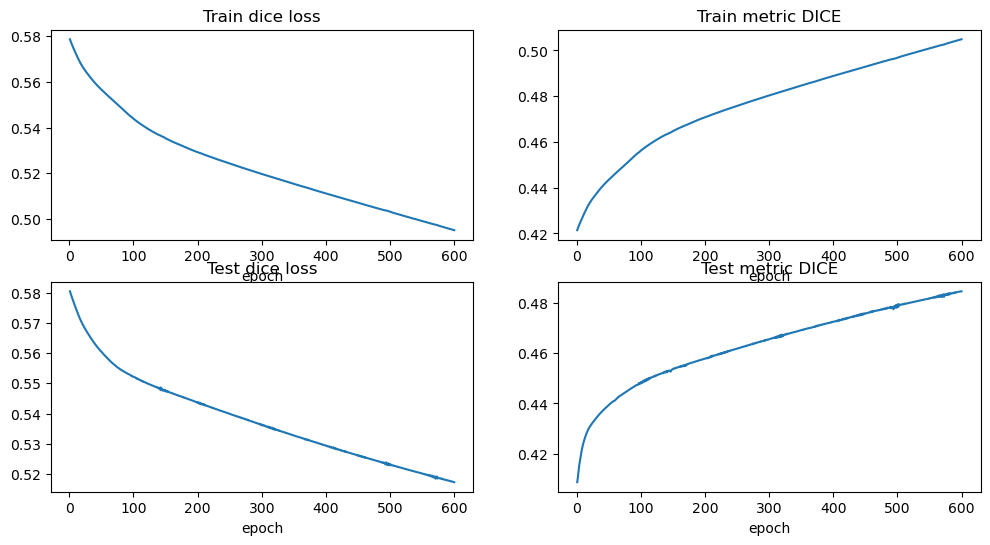

In [12]:
plt.figure("Results 25 june", (12, 6))
plt.subplot(2, 2, 1)
plt.title("Train dice loss")
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.title("Train metric DICE")
x = [i + 1 for i in range(len(train_metric))]
y = train_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 3)
plt.title("Test dice loss")
x = [i + 1 for i in range(len(test_loss))]
y = test_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.title("Test metric DICE")
x = [i + 1 for i in range(len(test_metric))]
y = test_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.show()

In [13]:
path_train_volumes = sorted(glob(os.path.join(in_dir, "TrainVolumes", "*.nii.gz")))
path_train_segmentation = sorted(glob(os.path.join(in_dir, "TrainSegmentation", "*.nii.gz")))

path_test_volumes = sorted(glob(os.path.join(in_dir, "TestVolumes", "*.nii.gz")))
path_test_segmentation = sorted(glob(os.path.join(in_dir, "TestSegmentation", "*.nii.gz")))

train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]
test_files = test_files[0:9]

In [16]:
path_train_volumes

['TrainVolumes/UPENN-GBM-00001_11_T1GD.nii.gz',
 'TrainVolumes/UPENN-GBM-00002_11_T1GD.nii.gz',
 'TrainVolumes/UPENN-GBM-00003_11_T1GD.nii.gz',
 'TrainVolumes/UPENN-GBM-00004_11_T1GD.nii.gz',
 'TrainVolumes/UPENN-GBM-00005_11_T1GD.nii.gz']

In [14]:
test_transforms = Compose(
    [
        LoadImaged(keys=["vol", "seg"]),
        AddChanneld(keys=["vol", "seg"]),
        Spacingd(keys=["vol", "seg"], pixdim=(1.5,1.5,1.0), mode=("bilinear", "nearest")),
        Orientationd(keys=["vol", "seg"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["vol"], a_min=-200, a_max=200,b_min=0.0, b_max=1.0, clip=True), 
        CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
        Resized(keys=["vol", "seg"], spatial_size=[128,128,64]),   
        ToTensord(keys=["vol", "seg"]),
    ]
)

In [15]:
test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [16]:
model.load_state_dict(torch.load(
    os.path.join(model_dir, "best_metric_model.pth")))
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


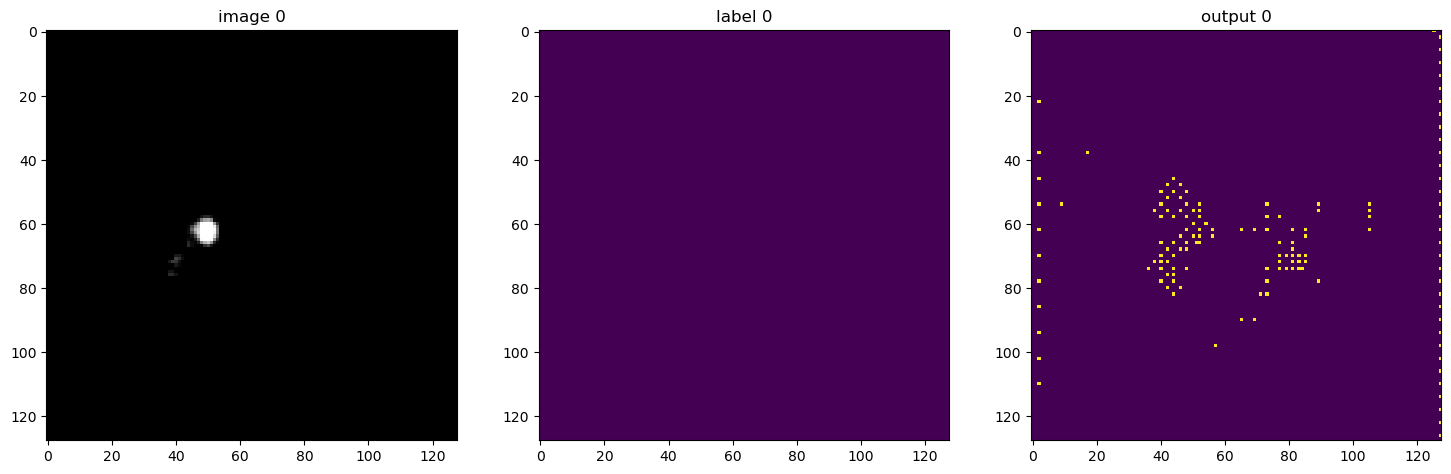

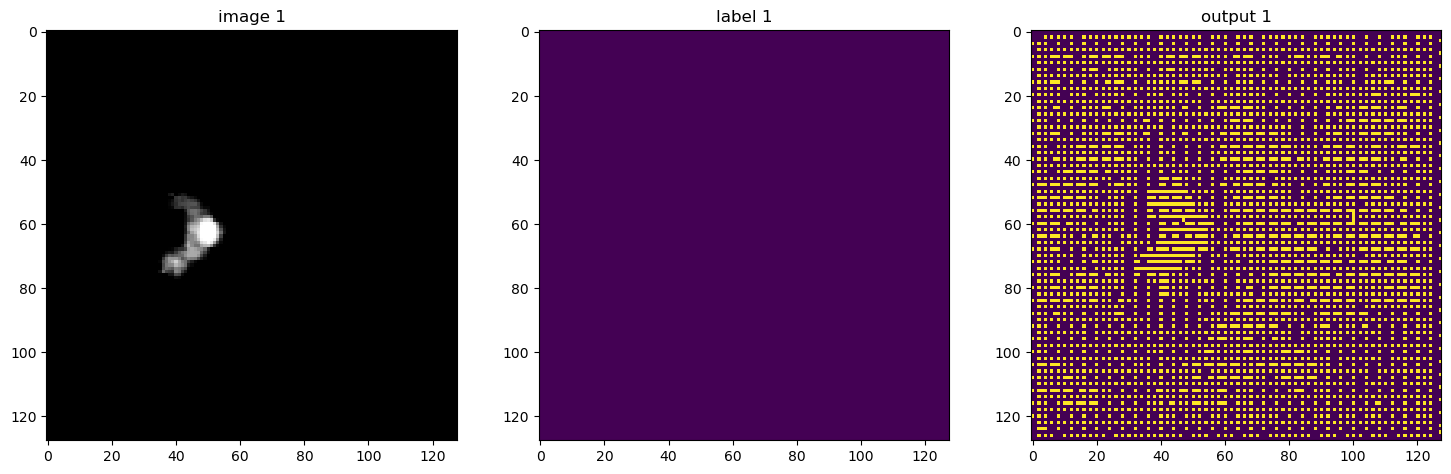

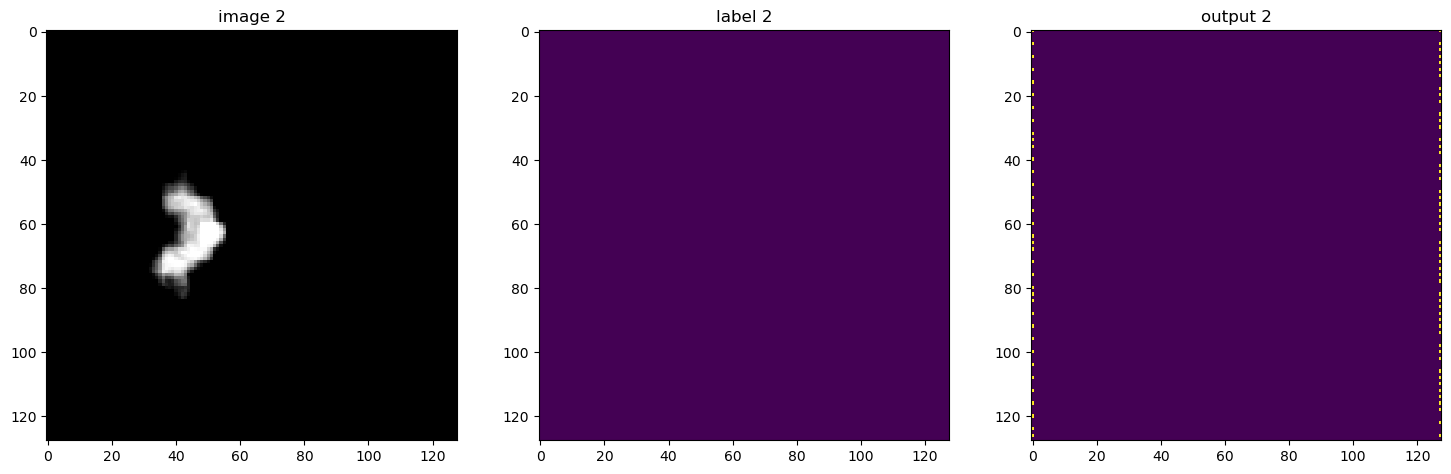

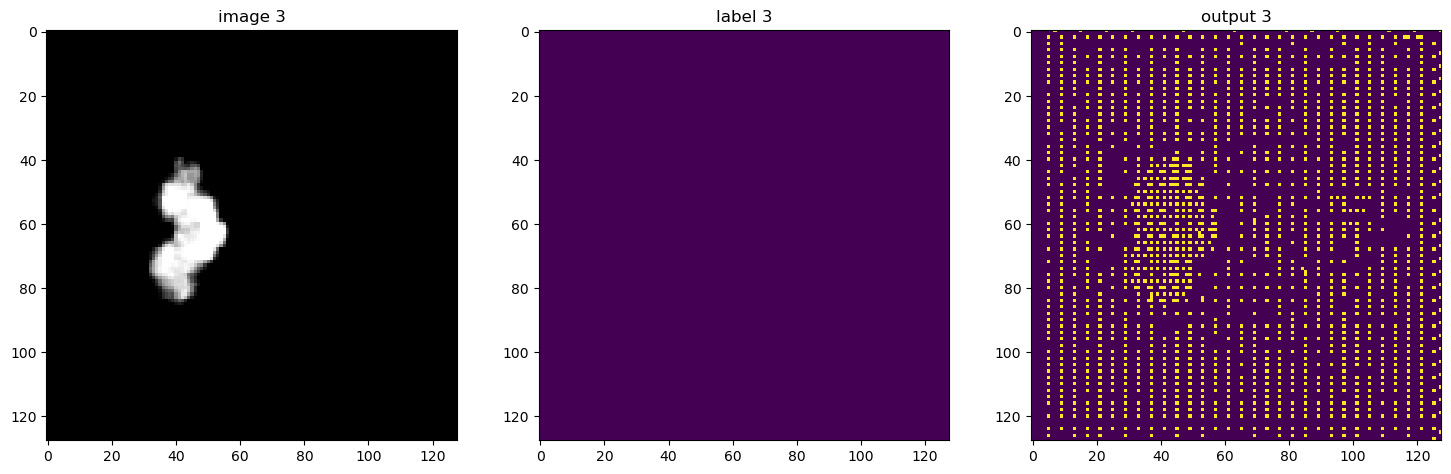

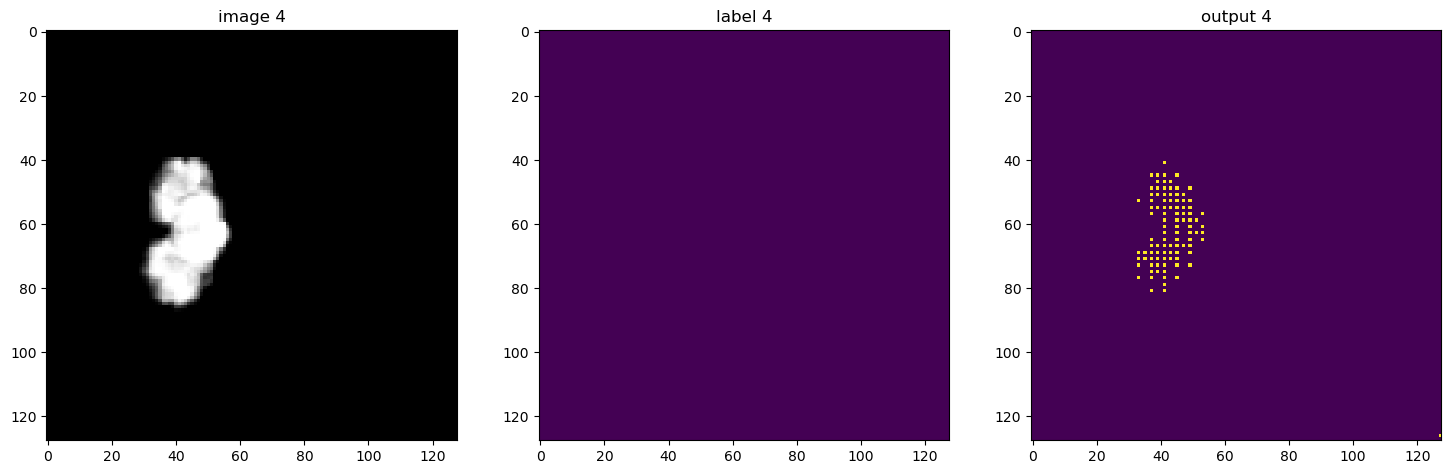

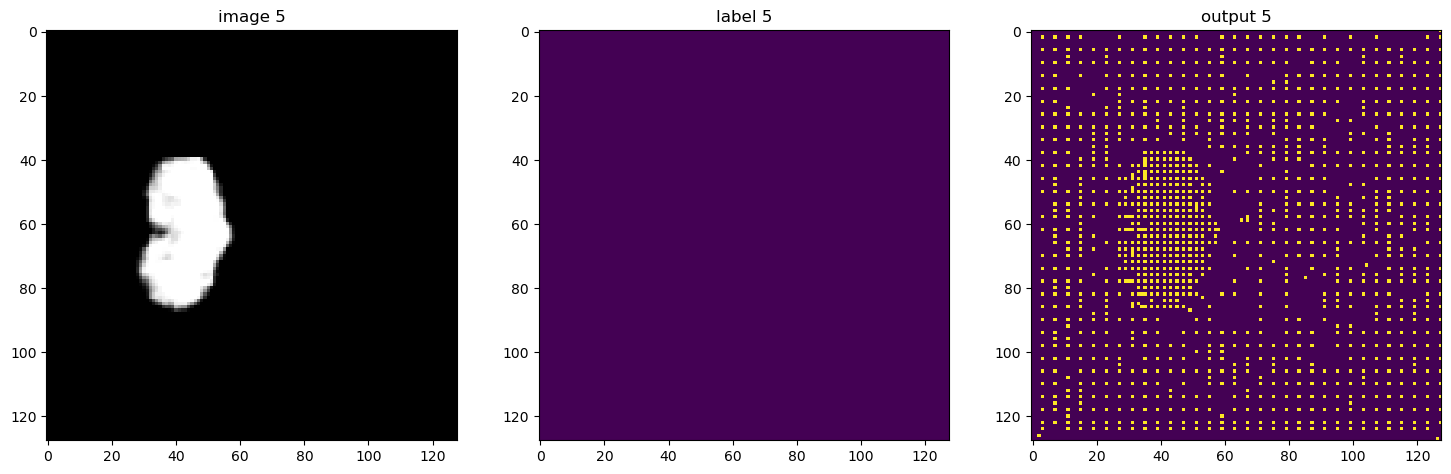

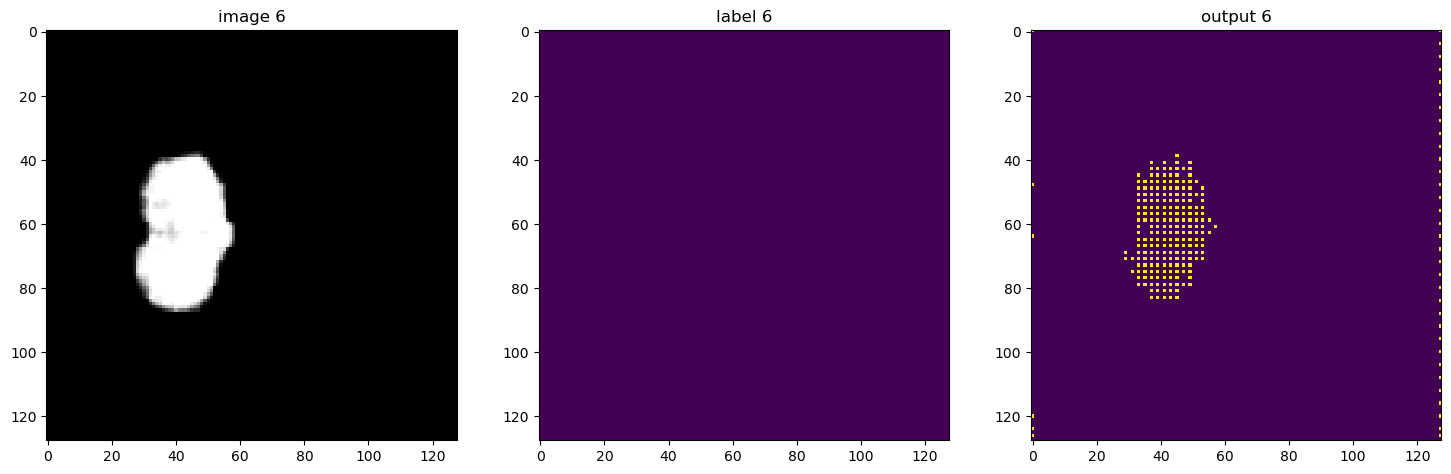

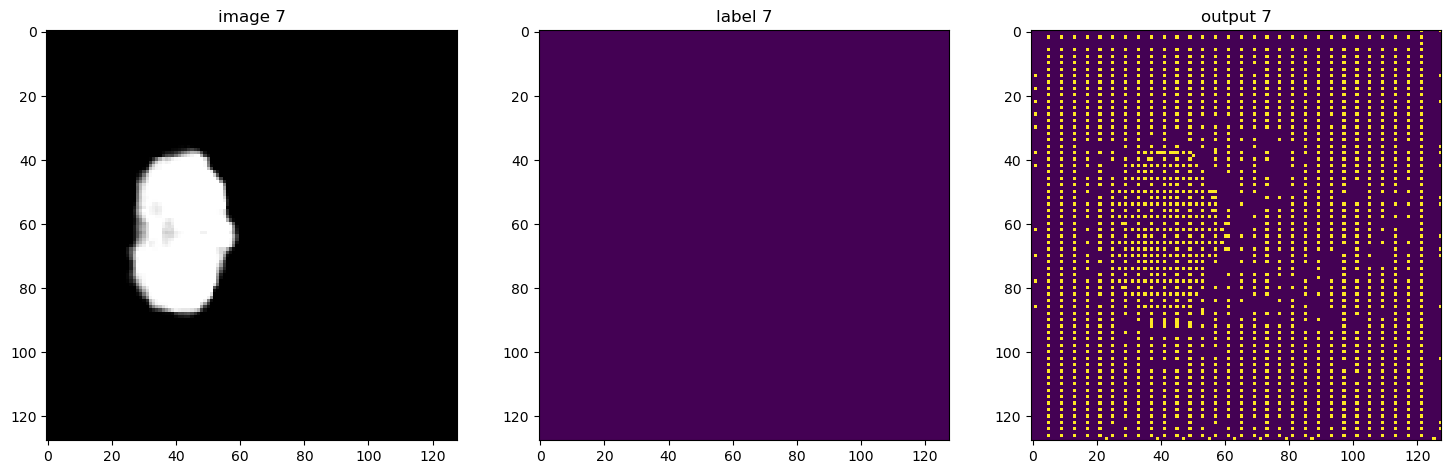

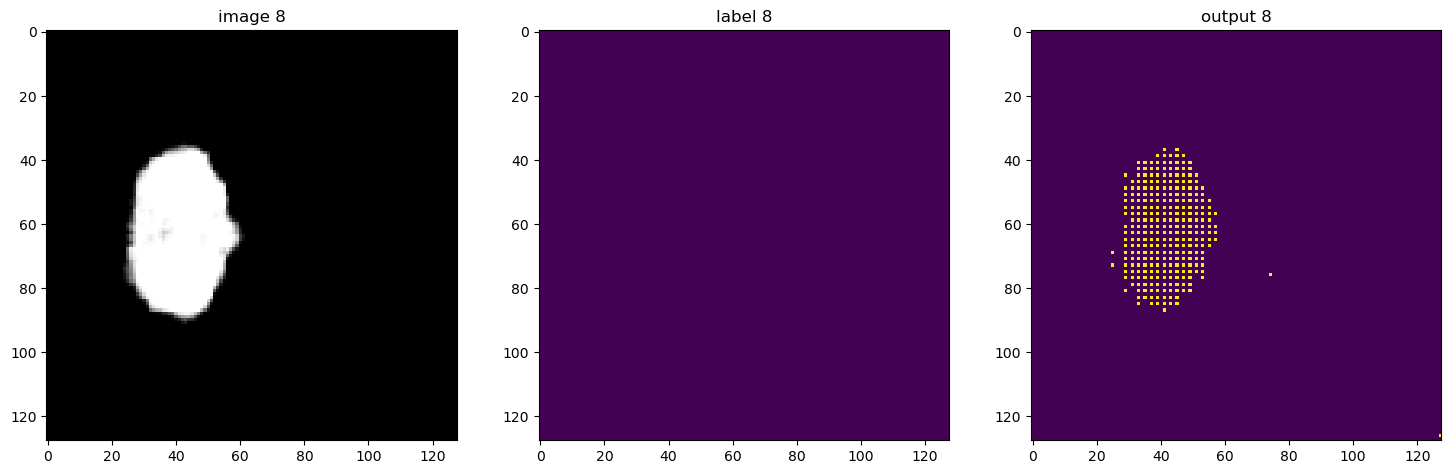

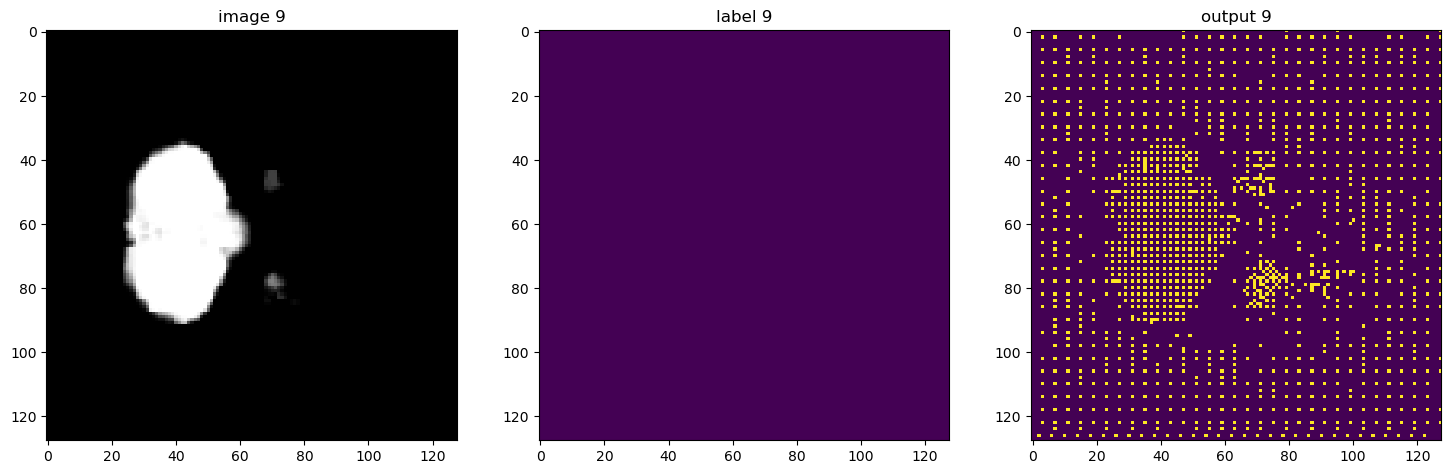

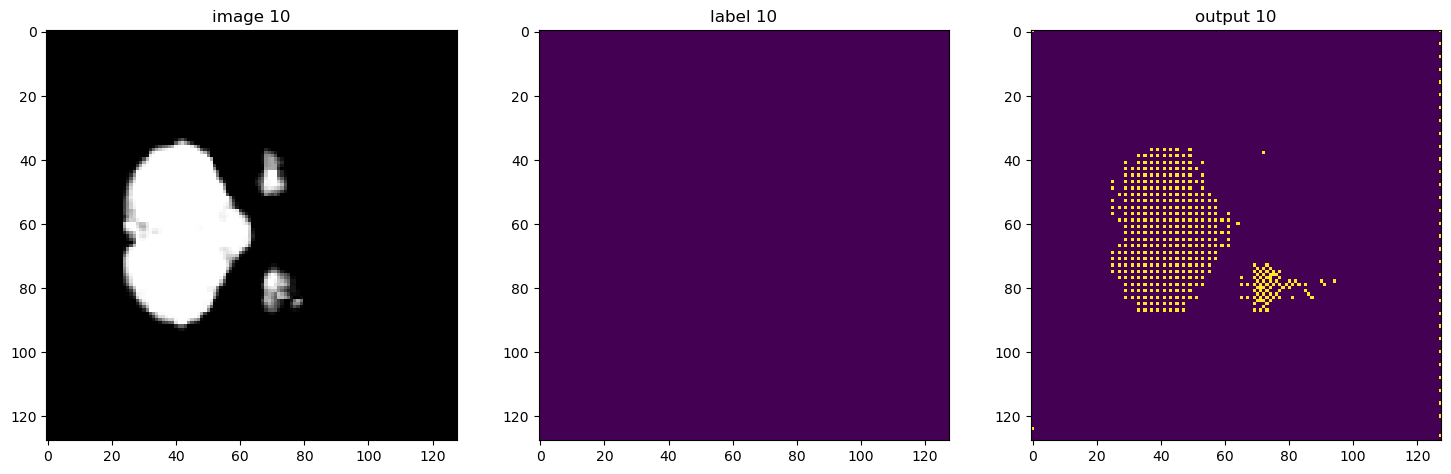

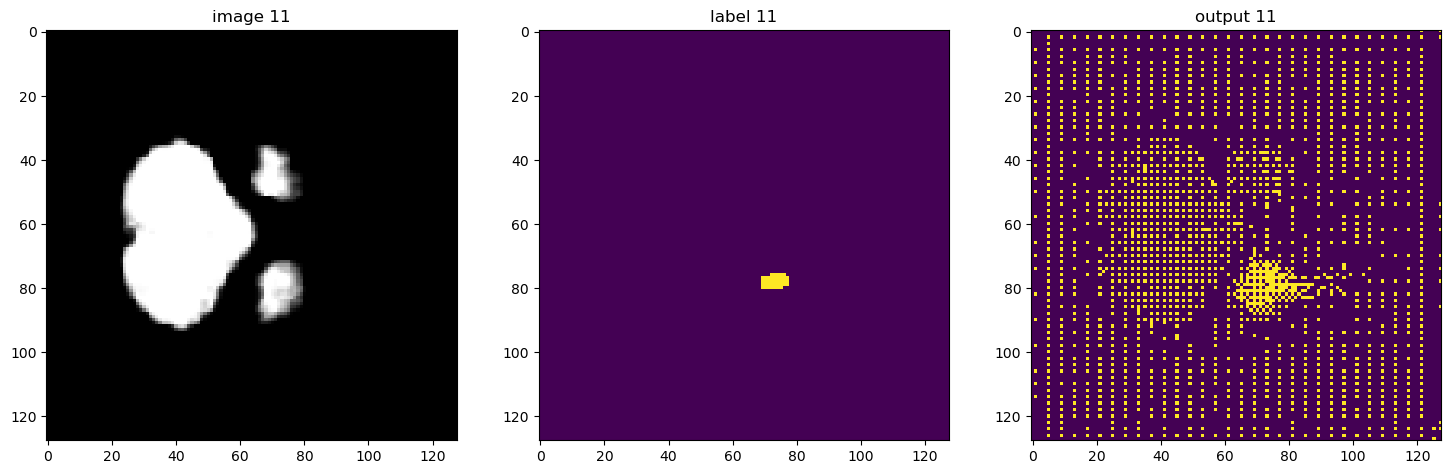

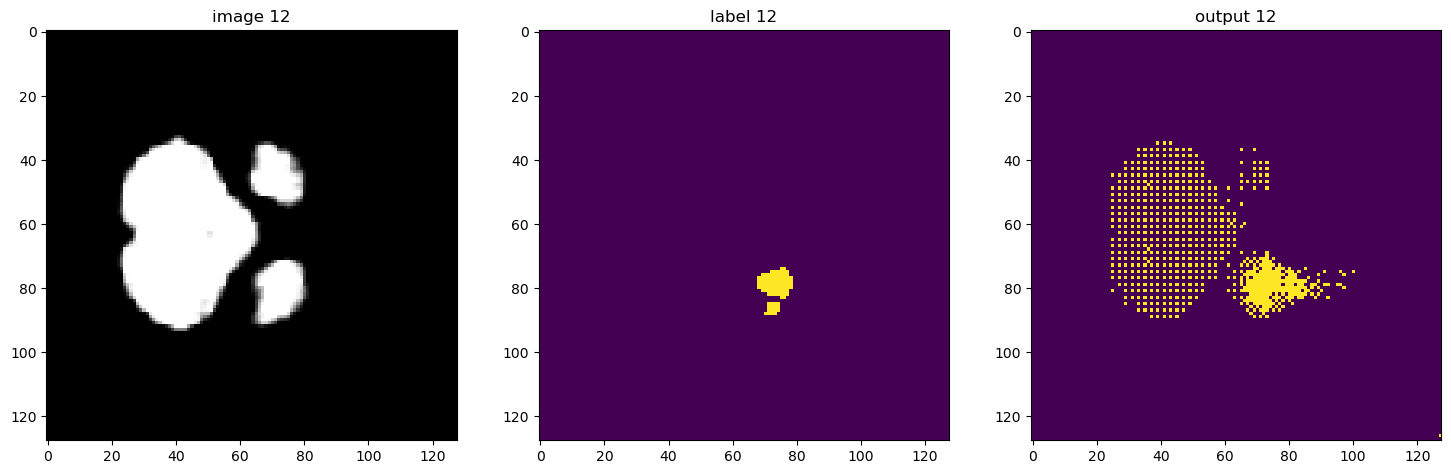

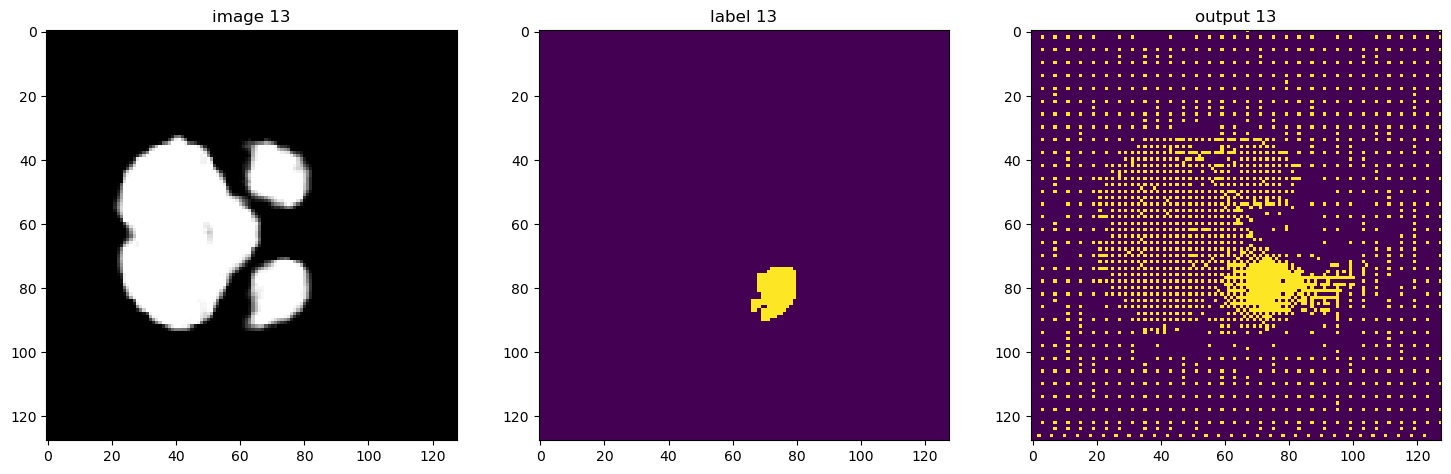

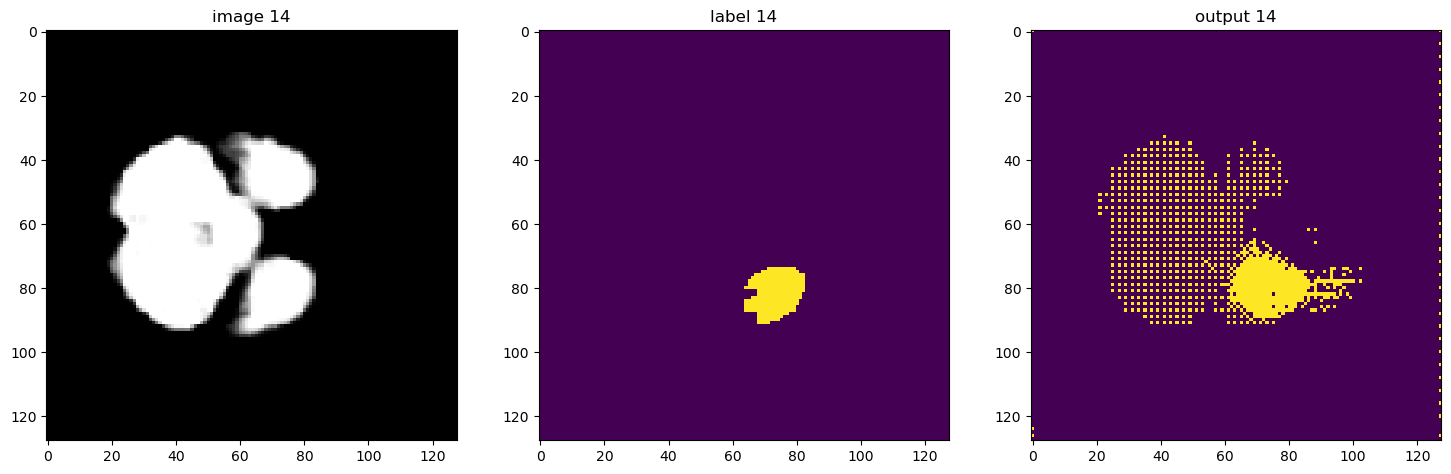

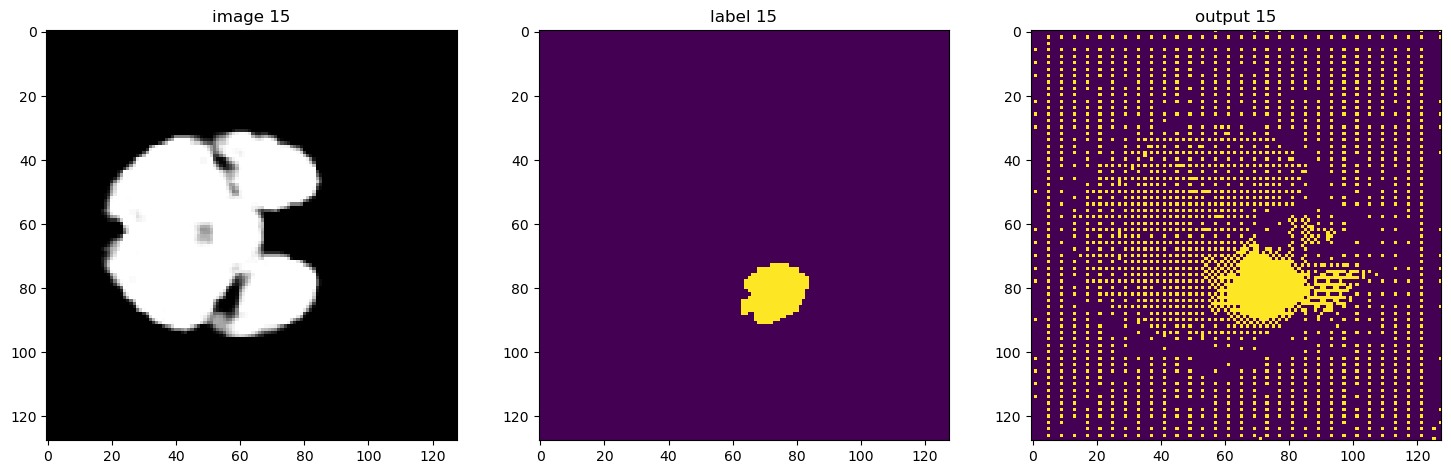

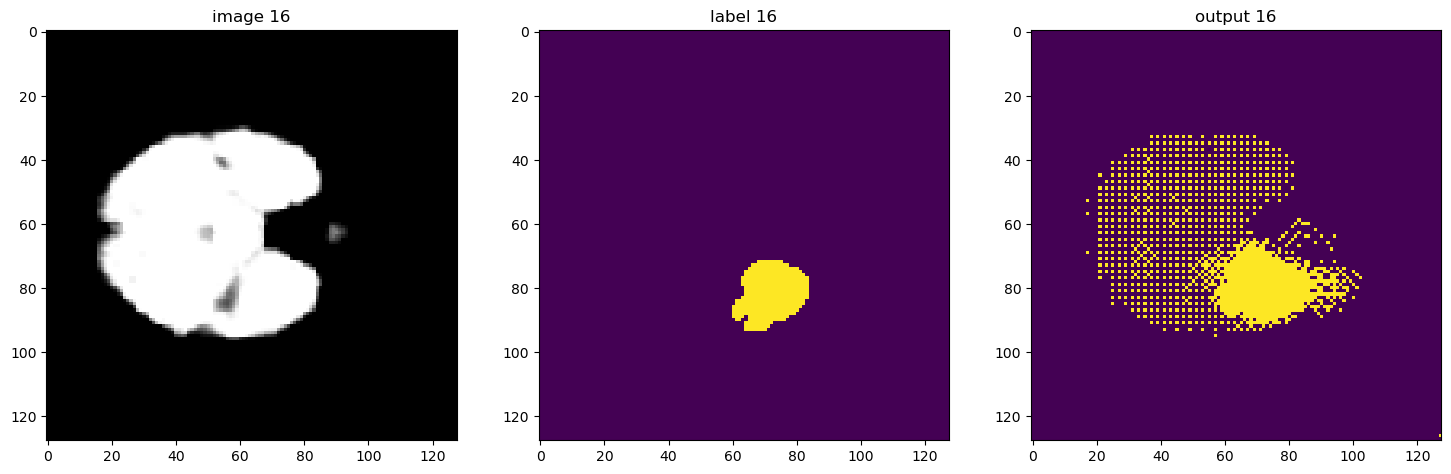

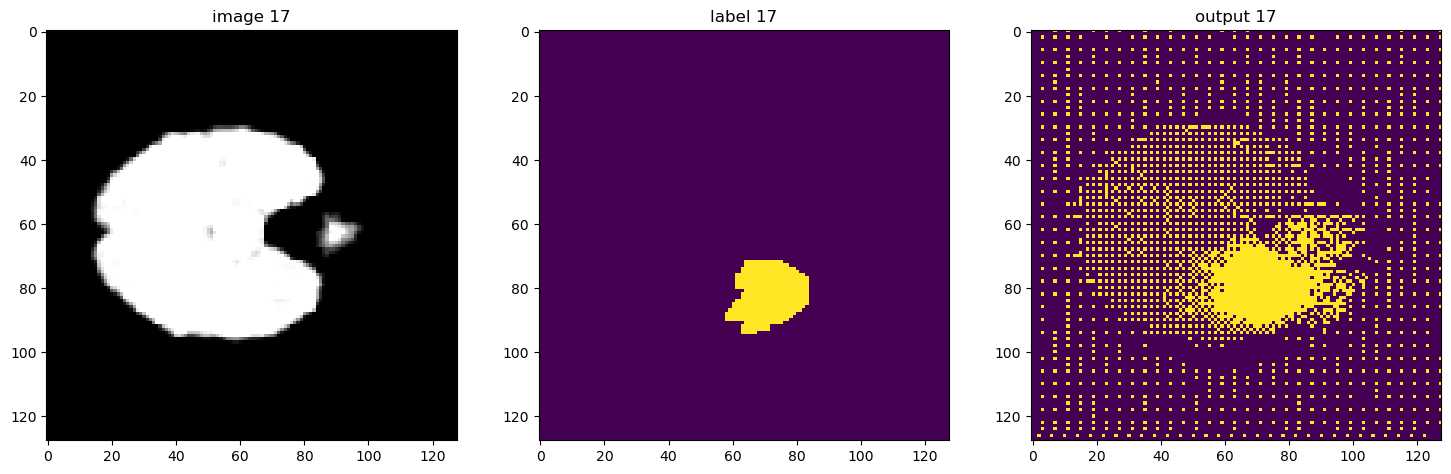

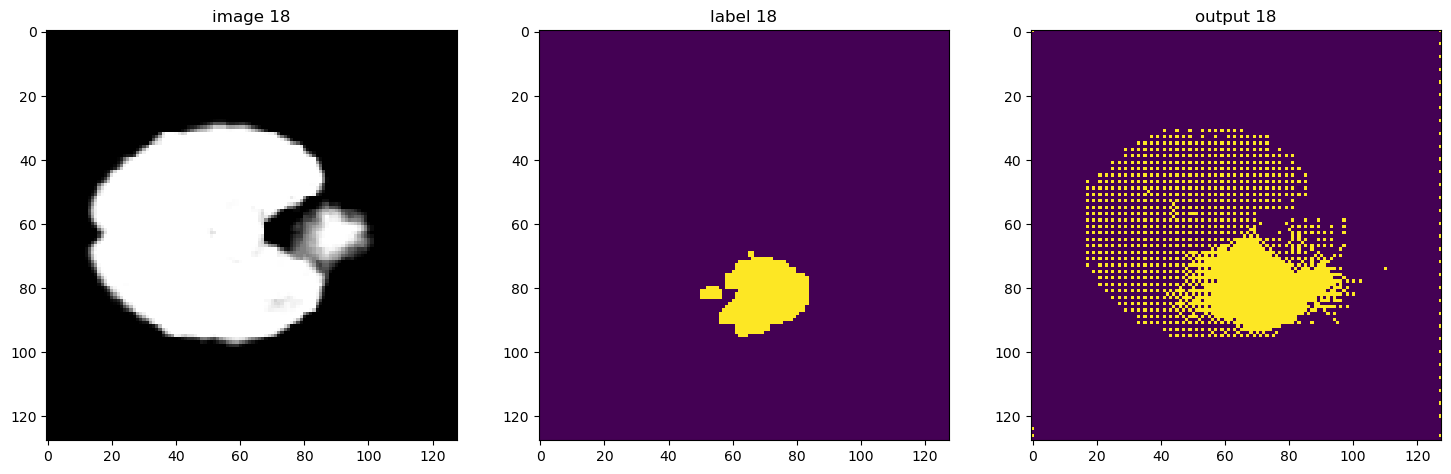

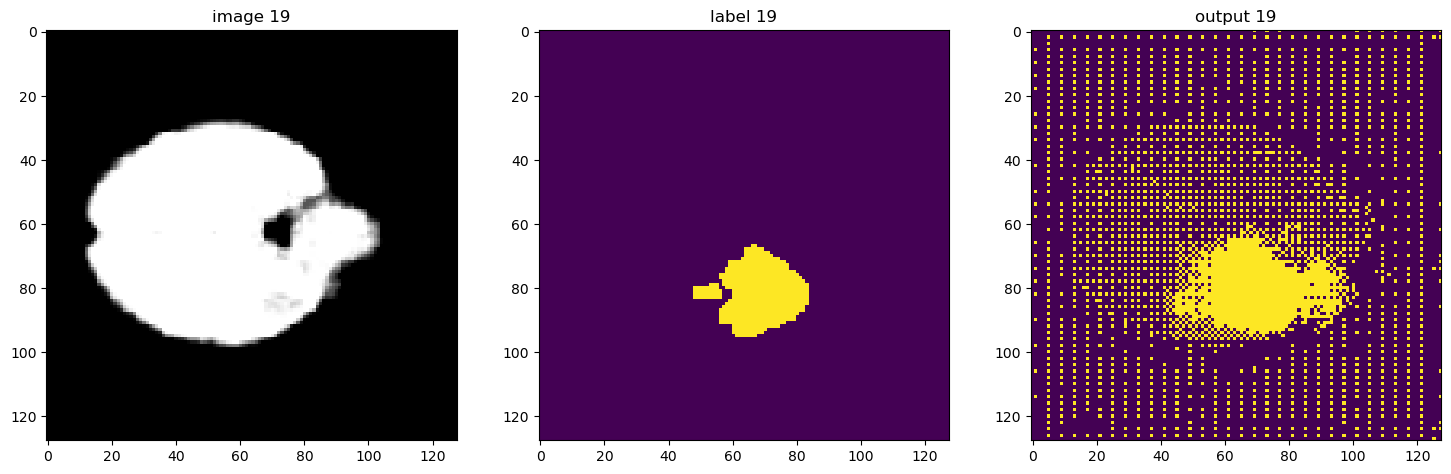

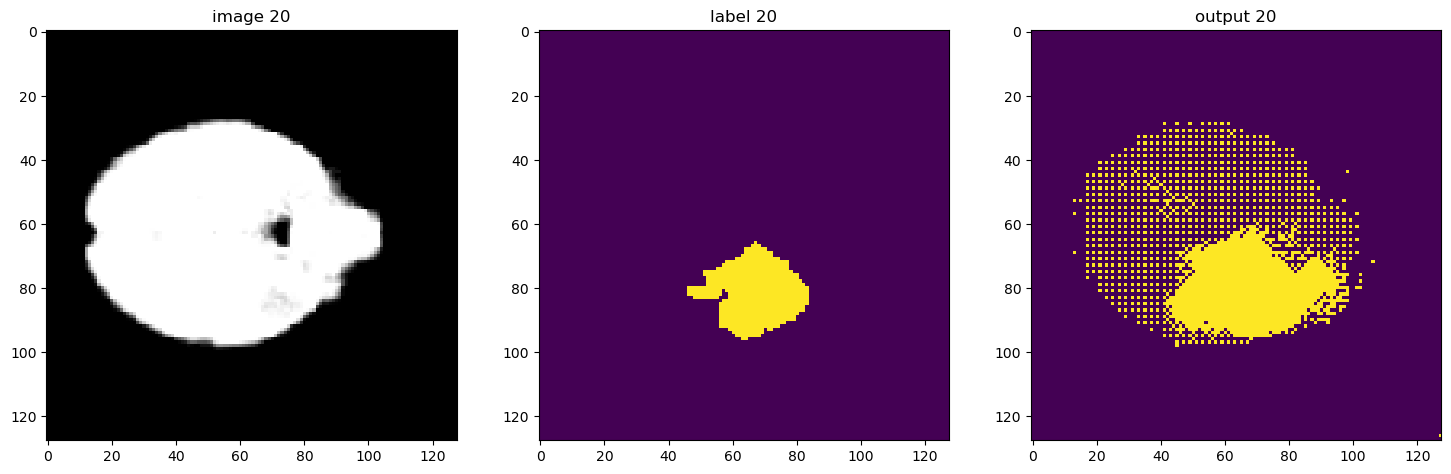

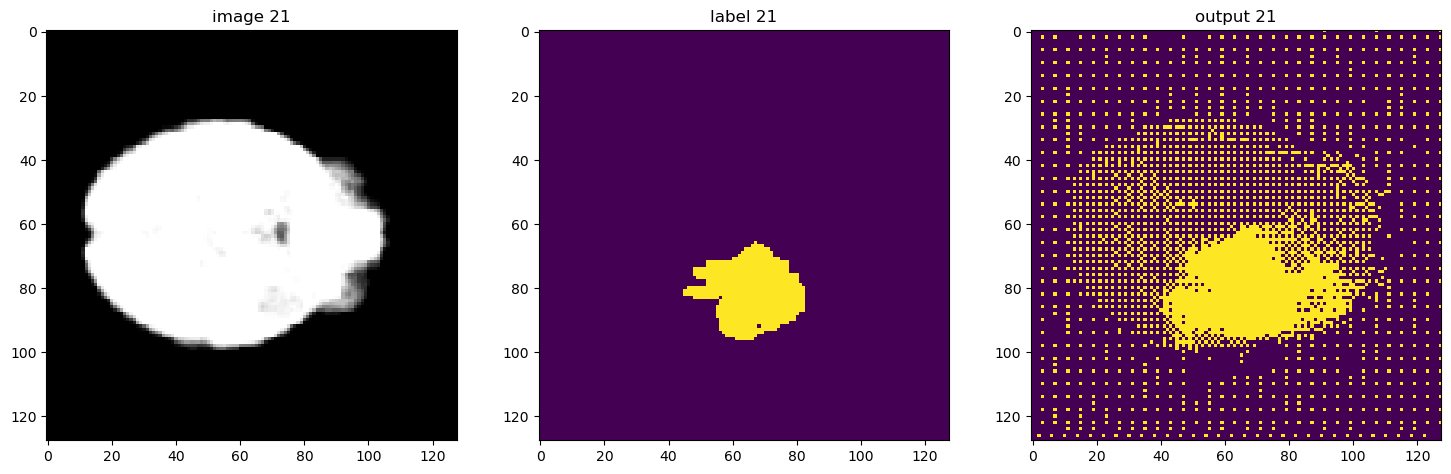

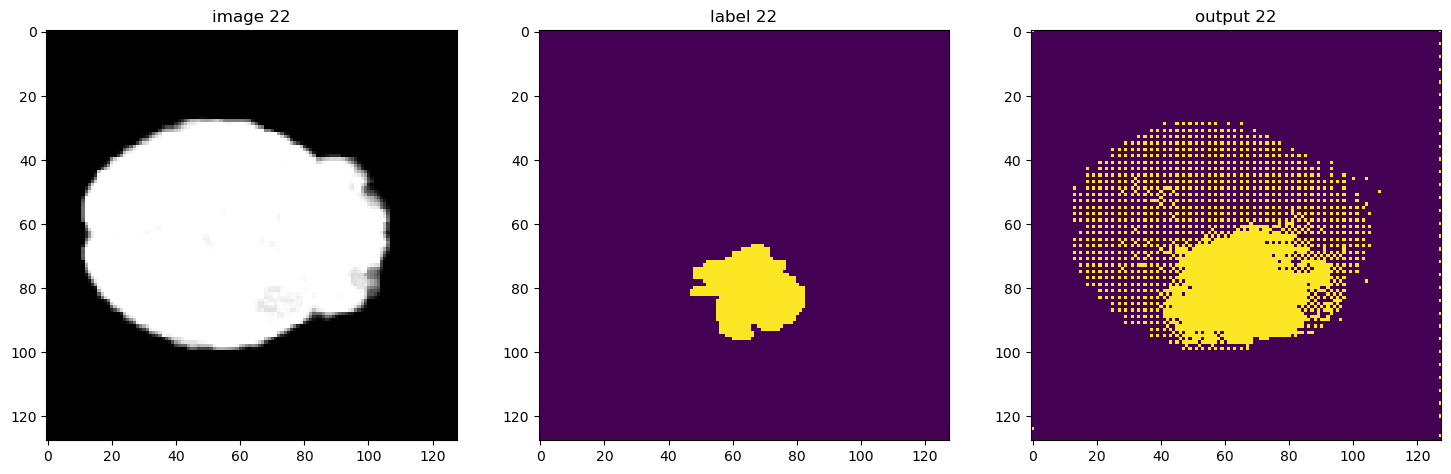

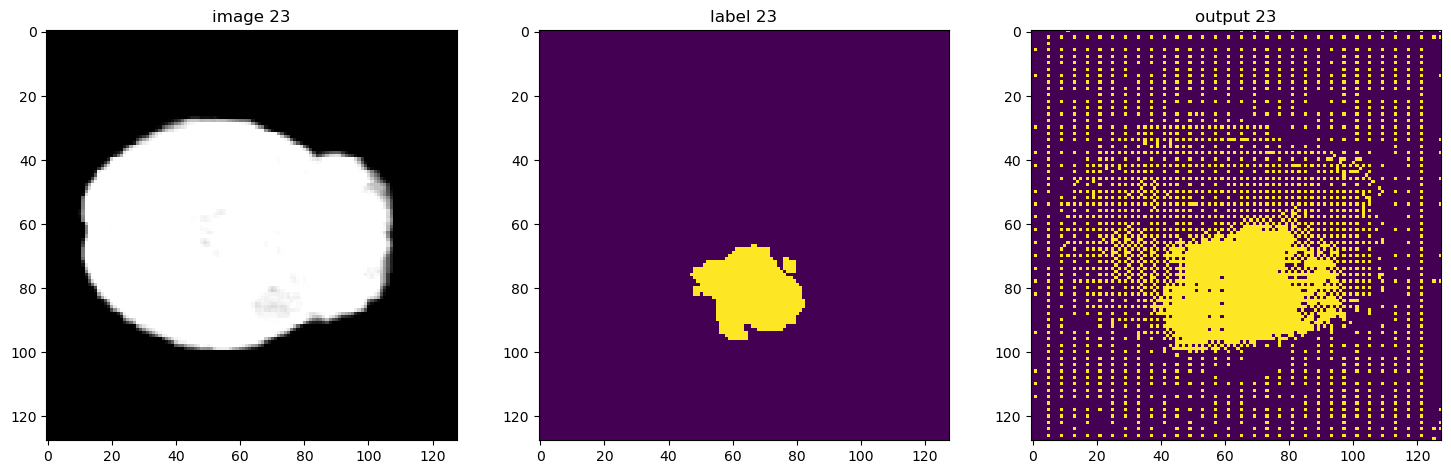

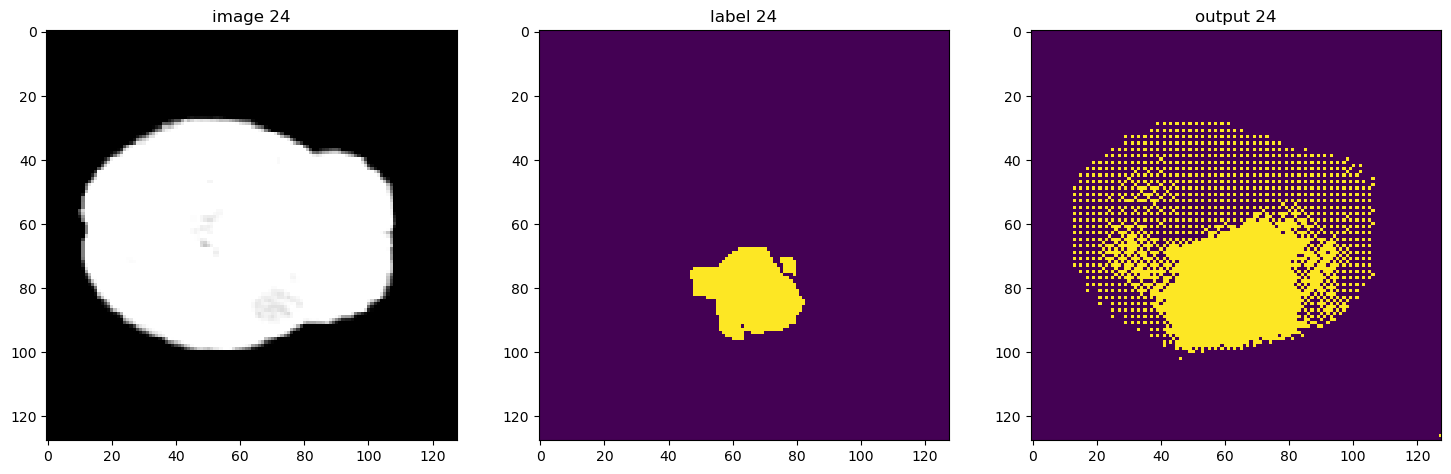

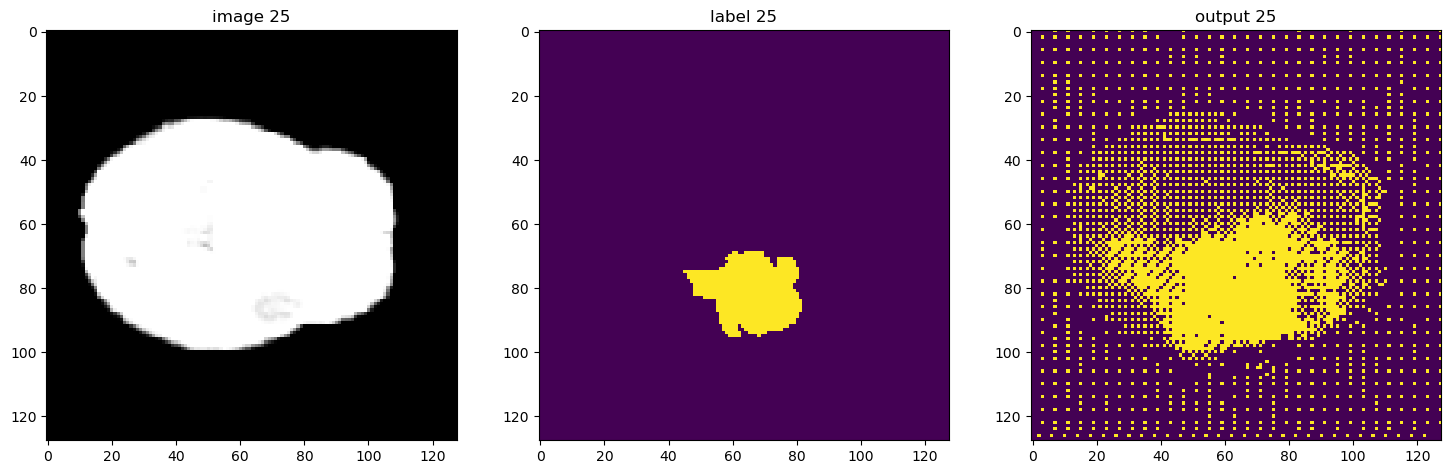

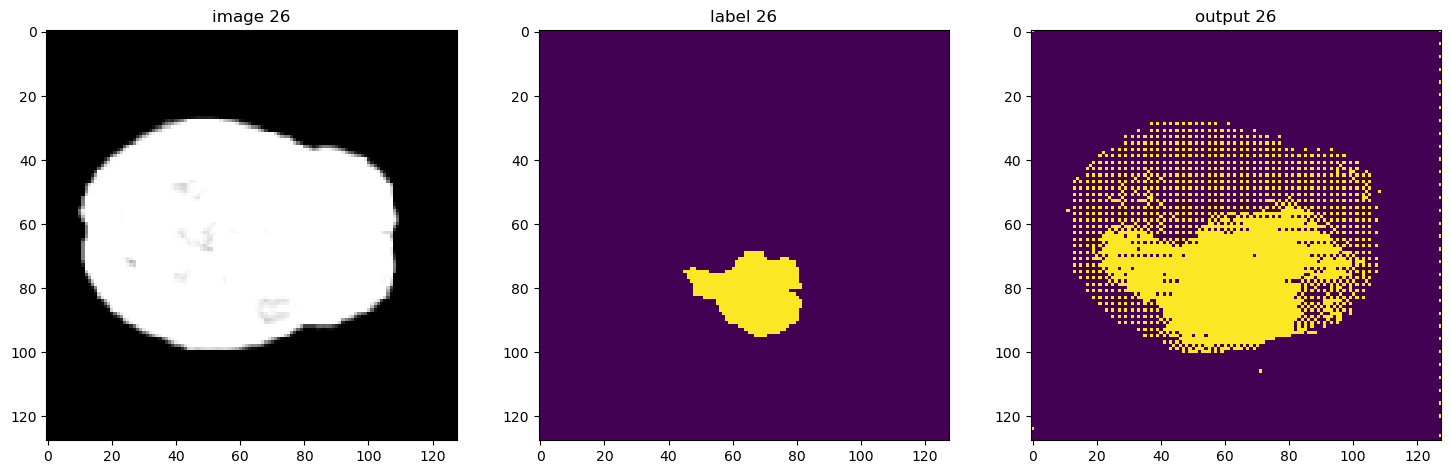

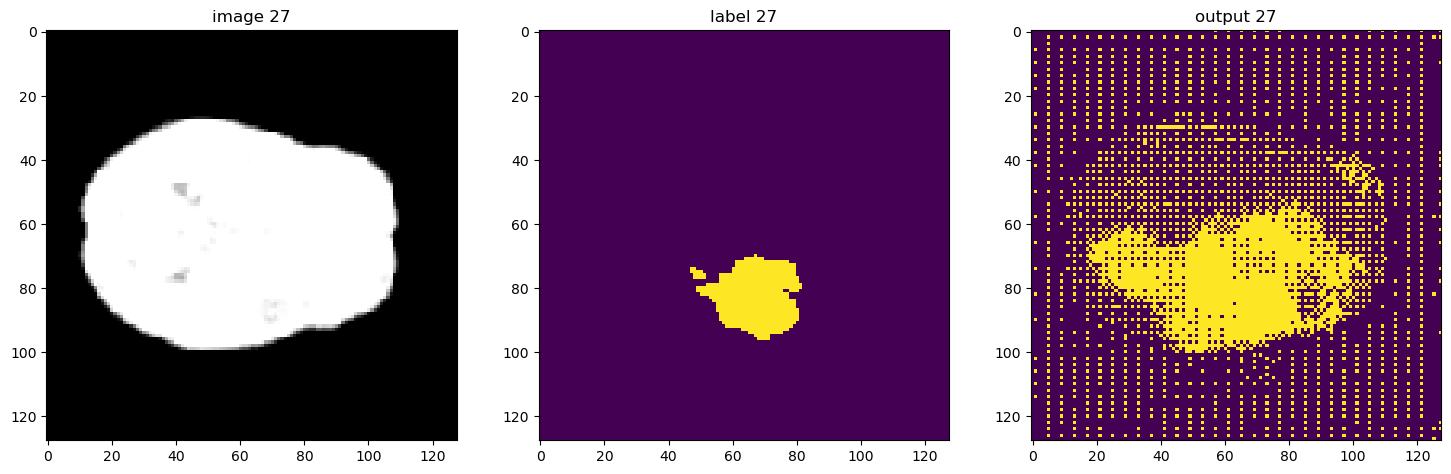

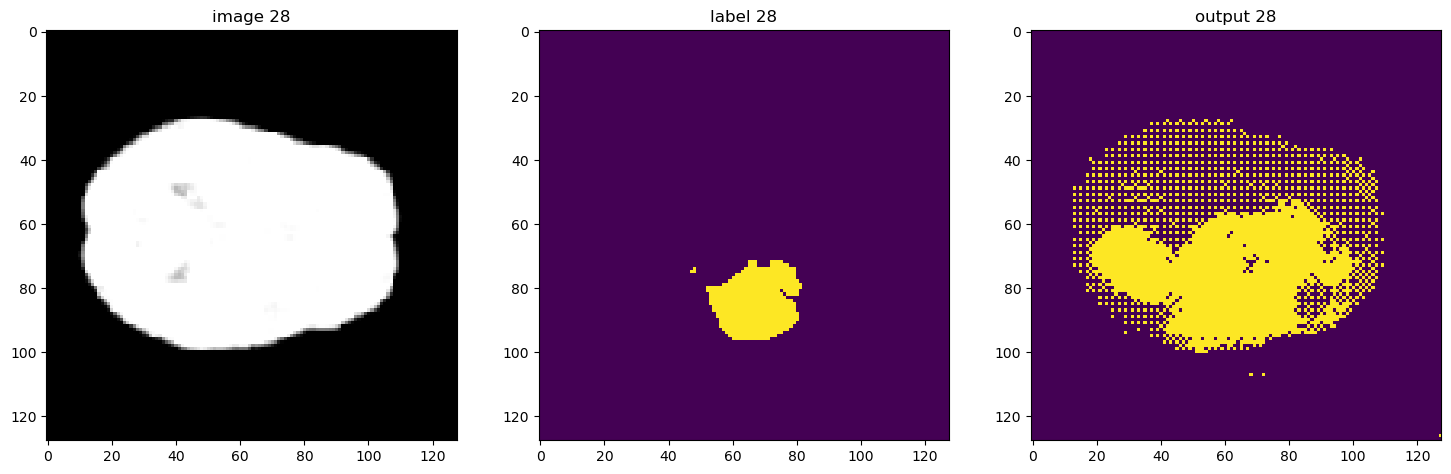

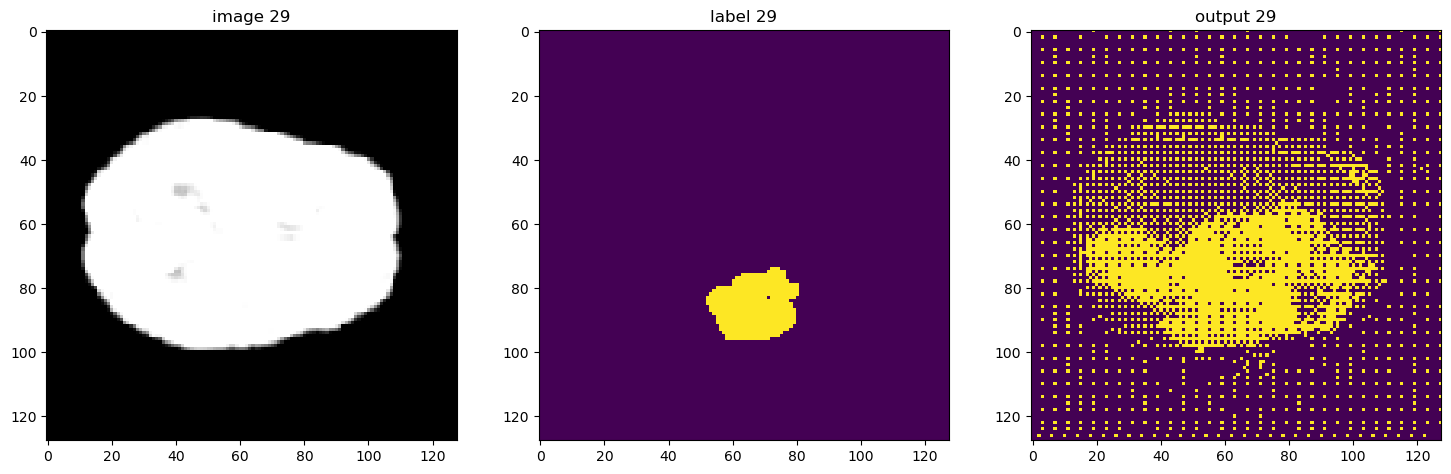

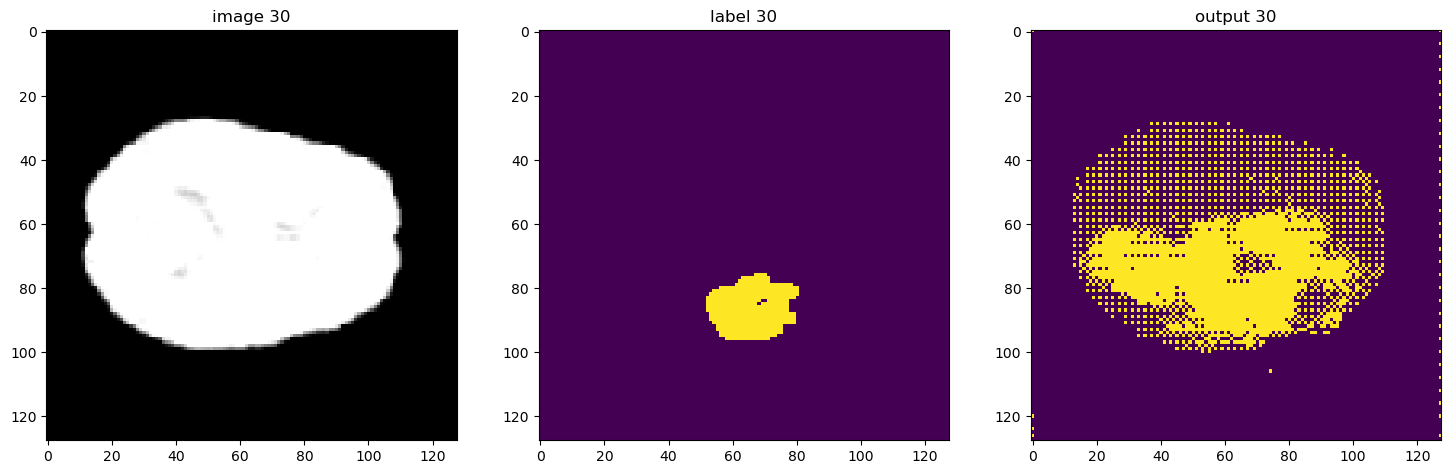

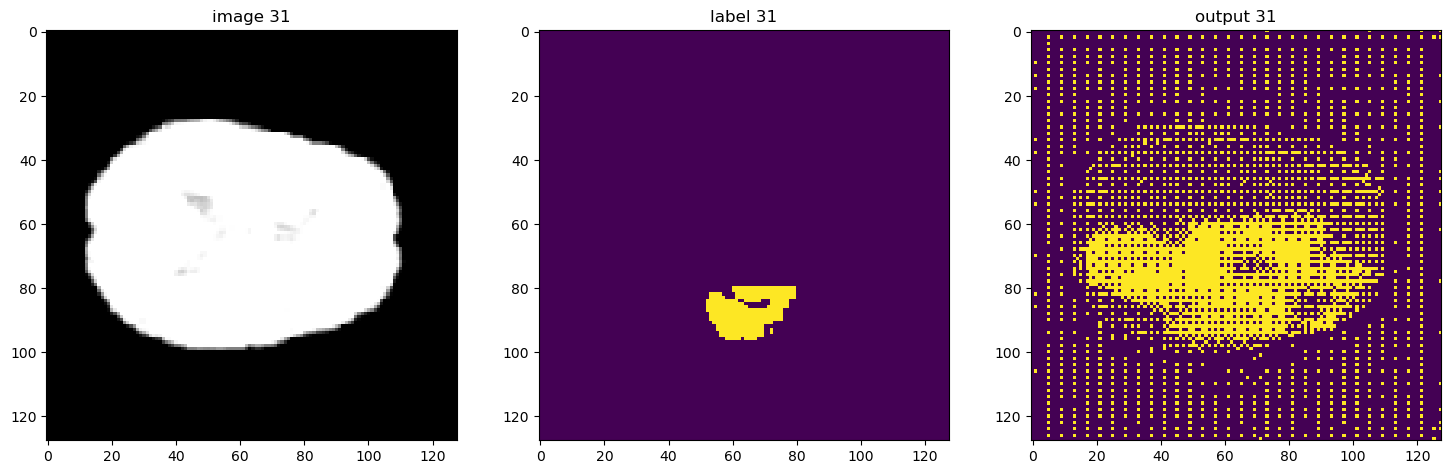

In [17]:
sw_batch_size = 4
roi_size = (128, 128, 64)
with torch.no_grad():
    test_patient = first(test_loader)
    t_volume = test_patient['vol']
    #t_segmentation = test_patient['seg']
    
    test_outputs = sliding_window_inference(t_volume.to(device), roi_size, sw_batch_size, model)
    sigmoid_activation = Activations(sigmoid=True)
    test_outputs = sigmoid_activation(test_outputs)
    test_outputs = test_outputs > 0.53
        
    for i in range(32):
        # plot the slice [:, :, 80]
        plt.figure("check", (18, 6))
        plt.subplot(1, 3, 1)
        plt.title(f"image {i}")
        plt.imshow(test_patient["vol"][0, 0, :, :, i], cmap="gray")
        plt.subplot(1, 3, 2)
        plt.title(f"label {i}")
        plt.imshow(test_patient["seg"][0, 0, :, :, i] != 0)
        plt.subplot(1, 3, 3)
        plt.title(f"output {i}")
        plt.imshow(test_outputs.detach().cpu()[0, 1, :, :, i])
        plt.show()